In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq
import seaborn as sns
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import sklearn
from sklearn.decomposition import PCA
import itertools
import mdtraj as md


This is a one millsecond trajectory of ubiquitin generated from DEShaw Research:

https://pubs.acs.org/doi/abs/10.1021/acs.jpcb.6b02024

Trajectory from DESRES can be downloaded here:
https://www.dropbox.com/s/qk4winh3y66bynm/ubq.desres.s500.zip?dl=0

It can be compared to an NMR ensmeble:
https://www.wwpdb.org/pdb?id=pdb_00002kox

In [2]:
pdb='/Users/Kerenattiku/Desktop/AggR_DA_MD/AggR_DA_stripped_structure.pdb'
trajectory='/Users/Kerenattiku/Desktop/AggR_DA_MD/AggR_DA_stripped_trajectory.dcd'
outdir='/Users/Kerenattiku/Desktop/AggR_DA_MD/outdir'

if not os.path.exists('outdir'):
    os.makedirs('outdir')
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trajectory:",trajectory)

outdir: /Users/Kerenattiku/Desktop/AggR_DA_MD/outdir
pdb: /Users/Kerenattiku/Desktop/AggR_DA_MD/AggR_DA_stripped_structure.pdb
trajectory: /Users/Kerenattiku/Desktop/AggR_DA_MD/AggR_DA_stripped_trajectory.dcd


In [3]:
trj = md.load(trajectory, top=pdb,stride=5)
trj.center_coordinates()
trj.superpose(trj[0])
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [4]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])



#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4423

Number of residues: 266

Number of frames: 6000

Starting frame: 0

Last frame: 6000

sequence:  [MET1, LYS2, LEU3, LYS4, GLN5, ASN6, ILE7, GLU8, LYS9, GLU10, ILE11, ILE12, LYS13, ILE14, ASN15, ASN16, ILE17, ARG18, ILE19, HIS20, GLN21, TYR22, THR23, VAL24, LEU25, TYR26, THR27, SER28, ASN29, CYS30, THR31, ILE32, ASP33, VAL34, TYR35, THR36, LYS37, GLU38, GLY39, SER40, ASN41, THR42, TYR43, LEU44, ARG45, ASN46, GLU47, LEU48, ILE49, PHE50, LEU51, GLU52, ARG53, GLY54, ILE55, ASN56, ILE57, SER58, VAL59, ARG60, LEU61, GLN62, LYS63, LYS64, LYS65, SER66, THR67, VAL68, ASN69, PRO70, PHE71, ILE72, ALA73, ILE74, ARG75, LEU76, SER77, SER78, ASP79, THR80, LEU81, ARG82, ARG83, LEU84, LYS85, ASP86, ALA87, LEU88, MET89, ILE90, ILE91, TYR92, GLY93, ILE94, SER95, LYS96, VAL97, ASP98, ALA99, CYS100, SER101, CYS102, PRO103, ASN104, TRP105, SER106, LYS107, GLY108, ILE109, ILE110, VAL111, ALA112, ASP113, ALA114, ASP115, ASP116, SER117, VAL118, LEU119, ASP120, THR121, 

In [5]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id
#residue_num

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [6]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'C', 'C', ..., 'C', 'C', 'NA'],
       ['C', 'C', 'C', ..., 'C', 'C', 'NA'],
       ['C', 'C', 'C', ..., 'C', 'C', 'NA'],
       ...,
       ['C', 'C', 'C', ..., 'C', 'C', 'NA'],
       ['C', 'C', 'C', ..., 'C', 'C', 'NA'],
       ['C', 'C', 'C', ..., 'C', 'C', 'NA']], dtype='<U2')

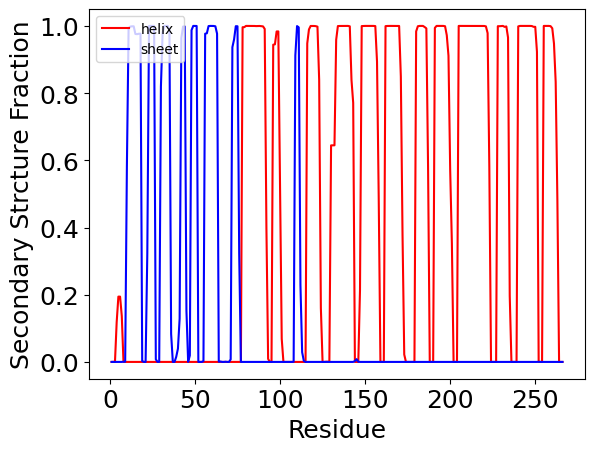

In [7]:
dssp=md.compute_dssp(trj,simplified=True)

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                    
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                     
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int)
 TotalH=np.sum(dsspH,axis=1) 
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
 return Hprop, Eprop

Hprop,Eprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


SS: H [ 78  79  80  81  82  83  84  85  86  87  88  89  90  91  96  97  98  99
 116 117 118 119 120 121 122 133 134 135 136 137 138 139 140 141 148 149
 150 151 152 153 154 155 156 162 163 164 165 166 167 168 169 170 180 181
 182 183 184 185 186 191 192 193 194 195 196 197 198 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 228 229 230 231 232
 233 234 240 241 242 243 244 245 246 247 248 249 250 251 255 256 257 258
 259 260 261]
SS: E [ 11  12  13  14  15  16  17  18  23  24  25  26  31  32  33  34  35  42
  43  44  48  49  50  51  56  57  58  59  60  61  62  63  72  73  74  75
 109 110 111]
SS: I []
SS: G []
SS: B []
SS: T [ 53  54 188 202 236]
SS: S [ 21  46  64  68 108 176 189 226 238 252 253]
SS:   [  1   2   3   9  19  27  36  40  47  52  55  69  71  77  94  95 106 107
 113 115 126 160 161 177 178 179 190 204 225 227 237 239 254 264 265]


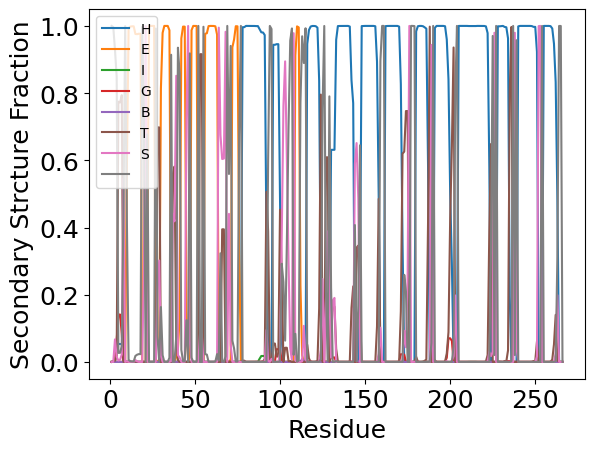

In [8]:
dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0                                                                                      
 dsspS[dsspS==type]=1                                                                                      
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1) 
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS) 
 return Sprop

for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


In [9]:
#Find all the frames where a given residue is H or E
residue_number=39
array_index=residue_number-0
print(np.asarray(residue_num)[array_index])
helix_frames=np.where(dssp[:,array_index]=='H')[0]
beta_frames=np.where(dssp[:,array_index]=='E')[0]

print("Residue %s"%np.asarray(residue_num)[array_index])
print("helix frames:",len(helix_frames),helix_frames)
print("beta frames:",len(beta_frames),beta_frames)

40
Residue 40
helix frames: 0 []
beta frames: 237 [ 510 1065 1562 1563 1564 1565 1566 1568 1570 1571 1572 1573 1575 1576
 1577 1578 1580 1581 1582 1583 1584 1585 1587 1588 1589 1590 1591 1592
 1593 1594 1595 1596 1597 1598 1599 1600 1601 1602 1603 1604 1605 1606
 1607 1608 1609 1610 1611 1612 1613 1614 1619 1623 1653 1657 1715 1719
 1720 1721 1722 1739 1740 1742 1743 1745 1848 1858 1859 1860 1861 1862
 1983 2008 2009 2017 2018 2019 2020 2024 2025 2026 2027 2030 2031 2033
 2034 2035 2036 2037 2038 2039 2040 2041 2042 2045 2046 2048 2049 2050
 2051 2053 2054 2055 2056 2057 2058 2061 2062 2063 2064 2066 2067 2074
 2078 2087 2092 2093 2094 2095 2096 2097 2098 2099 2100 2101 2102 2103
 2121 2126 2127 2133 2141 2149 2156 2161 2216 2229 2230 2231 2232 2233
 2235 2241 2249 2257 2266 2270 2277 2312 2337 2339 2345 2348 2352 2354
 2366 2377 2378 2380 2381 2485 2487 2538 2600 2645 2710 2757 2758 2802
 2821 2865 2926 2965 2972 2973 2977 2979 2980 2983 2987 2991 2992 3006
 3009 3010 3012 3016 3017 3

In [10]:
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [11]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)):
  indices = indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [12]:
sequence

' [MET1, LYS2, LEU3, LYS4, GLN5, ASN6, ILE7, GLU8, LYS9, GLU10, ILE11, ILE12, LYS13, ILE14, ASN15, ASN16, ILE17, ARG18, ILE19, HIS20, GLN21, TYR22, THR23, VAL24, LEU25, TYR26, THR27, SER28, ASN29, CYS30, THR31, ILE32, ASP33, VAL34, TYR35, THR36, LYS37, GLU38, GLY39, SER40, ASN41, THR42, TYR43, LEU44, ARG45, ASN46, GLU47, LEU48, ILE49, PHE50, LEU51, GLU52, ARG53, GLY54, ILE55, ASN56, ILE57, SER58, VAL59, ARG60, LEU61, GLN62, LYS63, LYS64, LYS65, SER66, THR67, VAL68, ASN69, PRO70, PHE71, ILE72, ALA73, ILE74, ARG75, LEU76, SER77, SER78, ASP79, THR80, LEU81, ARG82, ARG83, LEU84, LYS85, ASP86, ALA87, LEU88, MET89, ILE90, ILE91, TYR92, GLY93, ILE94, SER95, LYS96, VAL97, ASP98, ALA99, CYS100, SER101, CYS102, PRO103, ASN104, TRP105, SER106, LYS107, GLY108, ILE109, ILE110, VAL111, ALA112, ASP113, ALA114, ASP115, ASP116, SER117, VAL118, LEU119, ASP120, THR121, PHE122, LYS123, SER124, ILE125, ASP126, HIS127, ASN128, ASP129, ASP130, SER131, ARG132, ILE133, THR134, SER135, ASP136, LEU137, ILE138, T

In [13]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return




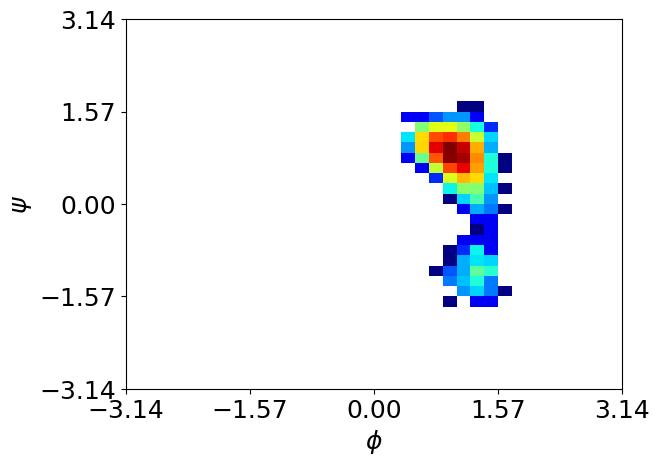

In [14]:
plot_phipsi(46)

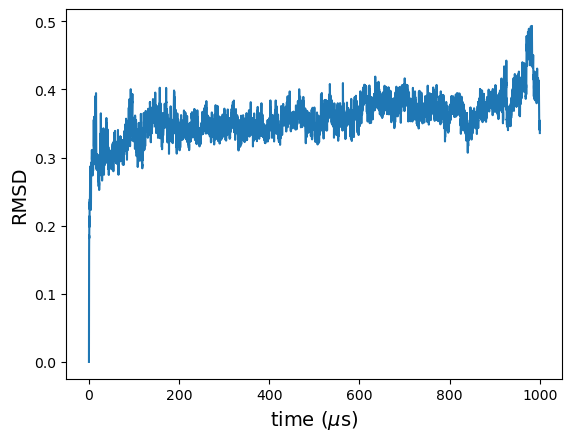

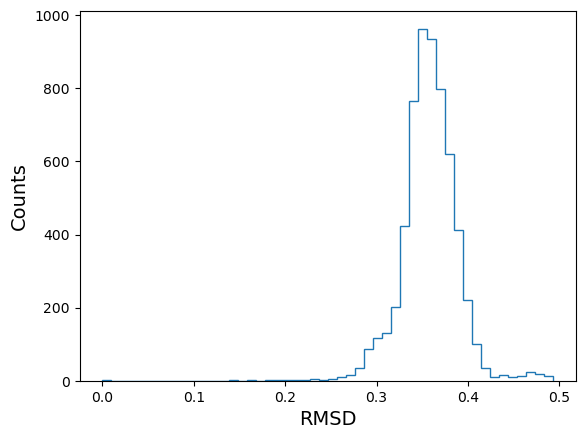

In [15]:
#Lets Calculate the RMSD and make a histogram from the starting structure 
time=np.linspace(0,1000,trj.n_frames)
rmsd = md.rmsd(trj, trj, 0)
plt.plot(time,rmsd)
plt.ylabel('RMSD',size=14);
plt.xlabel('time ($\mu$s)',size=14)
plt.show()
plt.clf()

plt.hist(rmsd,histtype='step',bins=50)
plt.ylabel('Counts',size=14);
plt.xlabel('RMSD',size=14)
plt.show()

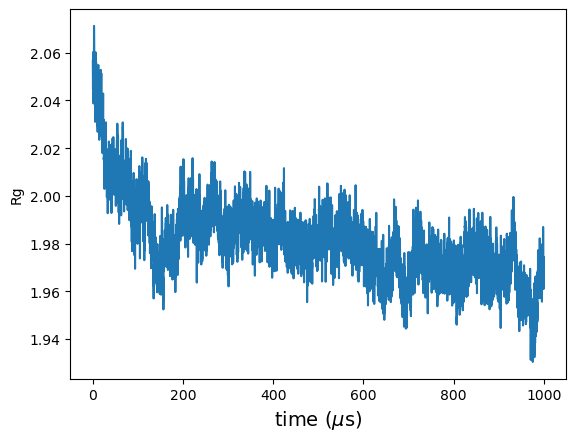

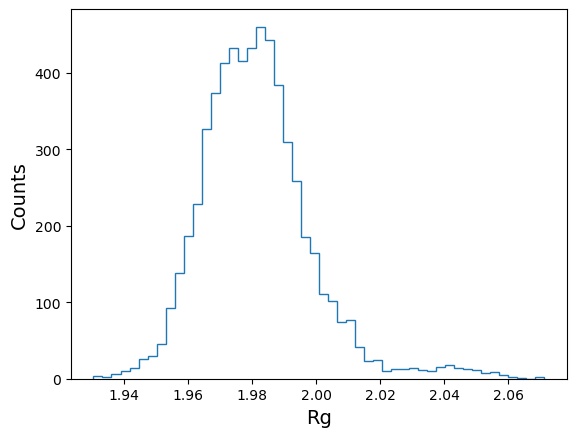

In [16]:
#Lets calculate the radius of gyration and make a histogram
rg=md.compute_rg(trj, masses=None)
plt.plot(time,rg)
plt.ylabel('Rg');
plt.xlabel('time ($\mu$s)',size=14)
plt.show()
plt.clf()

plt.hist(rg,histtype='step',bins=50)
plt.ylabel('Counts',size=14);
plt.xlabel('Rg',size=14)
plt.show()

In [17]:
#Lets identify subtantially populated hydrogen bonds
hbonds = md.baker_hubbard(trj, periodic=False)
label = lambda hbond : '%s -- %s' % (trj.topology.atom(hbond[0]), trj.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))
    

LEU3-N -- GLU8-OE1
GLN5-N -- GLN5-OE1
ASN6-N -- LEU3-O
ASN6-N -- ASN6-OD1
ILE7-N -- LYS4-O
GLU8-N -- LYS4-O
LYS9-N -- GLU8-OE1
LYS9-N -- GLU8-OE2
GLU10-N -- GLU8-O
GLU10-N -- LYS63-O
ILE11-N -- GLU10-OE1
ILE11-N -- GLU10-OE2
ILE12-N -- LEU61-O
ILE14-N -- VAL59-O
ASN15-N -- PHE251-O
ASN16-N -- SER58-OG
ASN16-ND2 -- HIS250-O
ILE17-N -- ILE57-O
ILE19-N -- ILE55-O
HIS20-N -- ARG18-O
HIS20-N -- LIG266-O1
HIS20-N -- LIG266-O2
HIS20-NE2 -- GLU171-OE1
HIS20-NE2 -- GLU171-OE2
GLN21-N -- LIG266-O1
GLN21-N -- LIG266-O2
GLN21-NE2 -- LEU76-O
THR23-N -- LEU51-O
VAL24-N -- ILE74-O
LEU25-N -- ILE49-O
TYR26-N -- ILE72-O
THR27-N -- GLU47-O
SER28-N -- TYR26-O
ASN29-N -- SER28-OG
ASN29-N -- PRO70-O
ASN29-ND2 -- LYS65-O
ASN29-ND2 -- ASN69-O
CYS30-N -- THR27-O
CYS30-N -- SER28-O
CYS30-N -- PRO70-O
THR31-N -- GLN62-O
ILE32-N -- LEU44-O
ASP33-N -- ARG60-O
VAL34-N -- THR42-O
TYR35-N -- SER58-O
THR36-N -- ASN41-OD1
GLU38-N -- THR36-OG1
GLY39-N -- THR36-OG1
GLY39-N -- THR36-O
SER40-N -- LYS107-O
ASN41-N -- GLY39

In [18]:
for hbond in hbonds:
 donor = top.atom(hbond[0])
 acc = top.atom(hbond[2])
 print(hbond,donor,acc)

[ 41  42 143] LEU3-N GLU8-OE1
[82 83 93] GLN5-N GLN5-OE1
[ 99 100  59] ASN6-N LEU3-O
[ 99 100 107] ASN6-N ASN6-OD1
[113 114  81] ILE7-N LYS4-O
[132 133  81] GLU8-N LYS4-O
[147 148 143] LYS9-N GLU8-OE1
[147 148 144] LYS9-N GLU8-OE2
[169 170 146] GLU10-N GLU8-O
[ 169  170 1083] GLU10-N LYS63-O
[184 185 180] ILE11-N GLU10-OE1
[184 185 181] ILE11-N GLU10-OE2
[ 203  204 1044] ILE12-N LEU61-O
[ 244  245 1001] ILE14-N VAL59-O
[ 263  264 4152] ASN15-N PHE251-O
[277 278 982] ASN16-N SER58-OG
[ 286  288 4132] ASN16-ND2 HIS250-O
[291 292 974] ILE17-N ILE57-O
[334 335 941] ILE19-N ILE55-O
[353 354 333] HIS20-N ARG18-O
[ 353  354 4392] HIS20-N LIG266-O1
[ 353  354 4394] HIS20-N LIG266-O2
[ 364  365 2807] HIS20-NE2 GLU171-OE1
[ 364  365 2808] HIS20-NE2 GLU171-OE2
[ 370  371 4392] GLN21-N LIG266-O1
[ 370  371 4394] GLN21-N LIG266-O2
[ 382  384 1307] GLN21-NE2 LEU76-O
[408 409 876] THR23-N LEU51-O
[ 422  423 1264] VAL24-N ILE74-O
[438 439 837] LEU25-N ILE49-O
[ 457  458 1235] TYR26-N ILE72-O
[478 479 

[113 114  81] ILE7-N LYS4-O


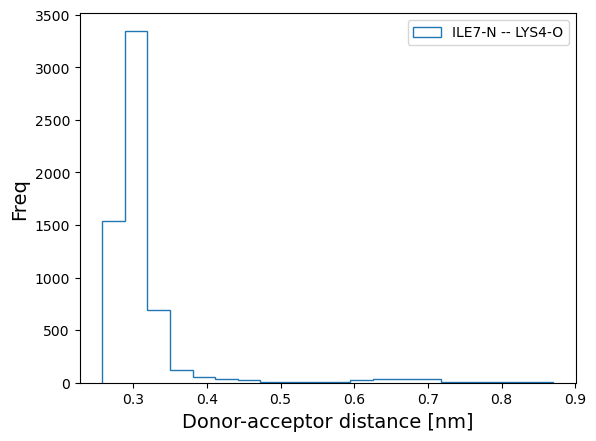

In [19]:
Hbond_index=4
hbond=hbonds[Hbond_index]
donor = top.atom(hbond[0])
acc = top.atom(hbond[2])
print(hbond,donor,acc)

da_distance = md.compute_distances(trj, [[hbond[0],hbond[2]]], periodic=False)
plt.hist(da_distance,histtype='step',bins=20, label=label(hbonds[Hbond_index]))
#for i in [2, 3, 4]:
#    plt.hist(da_distances[:, i], color=next(color),histtype='step',bins=10, label=label(hbonds[i]), alpha=0.5)
plt.legend()
plt.ylabel('Freq',size=14);
plt.xlabel('Donor-acceptor distance [nm]',size=14)
plt.show()

***We're going to run a Principle Component Analysis (PCA)***

This takes the variance of the cartesian coordinates of each atom over the course of the trajectory and finds "projections" that explain as much of variance as posisble.

https://en.wikipedia.org/wiki/Principal_component_analysis

In [20]:
import sklearn
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
trj.superpose(trj, 0)
reduced_cartesian = pca1.fit_transform(trj.xyz.reshape(trj.n_frames, trj.n_atoms * 3))
print(reduced_cartesian.shape)

(6000, 2)


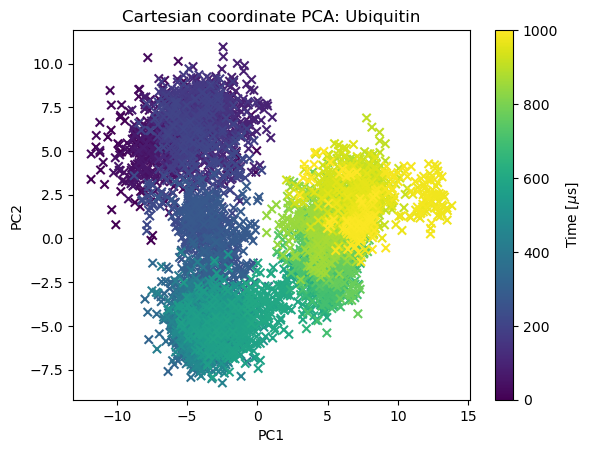

In [21]:
#We Can plot eaceh frame as a function of the values of each PC(principal component): PC1 and PC2
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=time)
plt.xlabel('PC1')
plt.ylabel('PC2') 
plt.title('Cartesian coordinate PCA: Ubiquitin')
cbar = plt.colorbar()
cbar.set_label('Time [$\mu$s]')

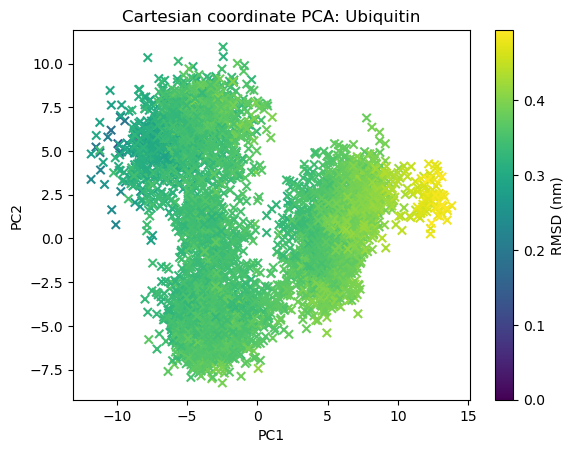

In [22]:
plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=rmsd)
plt.xlabel('PC1')
plt.ylabel('PC2') 
plt.title('Cartesian coordinate PCA: Ubiquitin')
cbar = plt.colorbar()
cbar.set_label('RMSD (nm)')

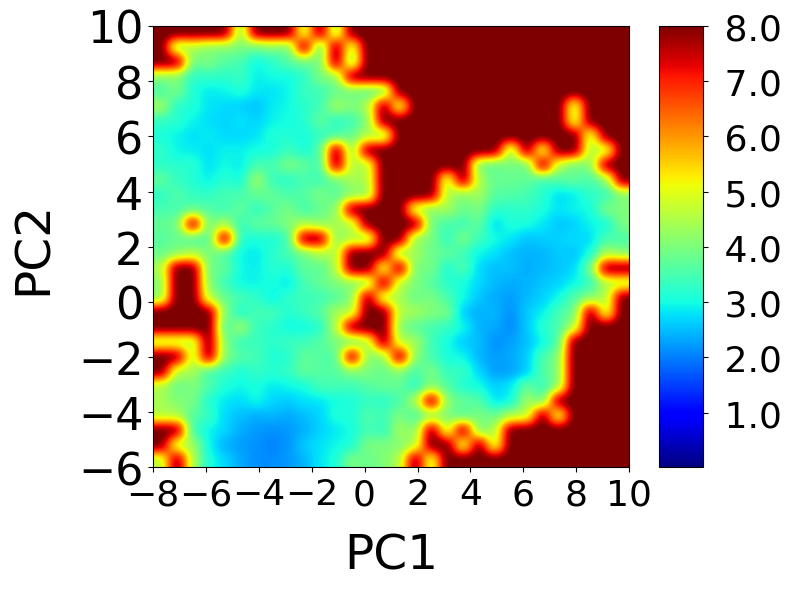

In [23]:
###Lets Make a Pretty Free Energy Plot of PC1 vs. PC2

def free_energy(a, b, T, y0, ymax, x0, xmax):
    free_energy, xedges, yedges = np.histogram2d(
        a, b, 30, [[y0, ymax], [x0, xmax]], density=True, weights=None)
    free_energy = np.log(np.flipud(free_energy)+.000001)
    free_energy = -(0.001987*T)*free_energy
    return free_energy, xedges, yedges

PC1=reduced_cartesian[:, 0]
PC2=reduced_cartesian[:,1]

dG,xedges,yedges=free_energy(PC2, PC1, 300, -6, 10, -8, 10)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5,6,7,8]
plt.xlim(-8,10)
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.ylabel("PC2", size=35, labelpad=15)
plt.xlabel("PC1", size=35, labelpad=15)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xticks(size='26')
plt.yticks(size='32')
plt.axes(cb.ax)
plt.clim(vmin=0.01, vmax=8.0)
plt.yticks(size='26')
plt.tight_layout()

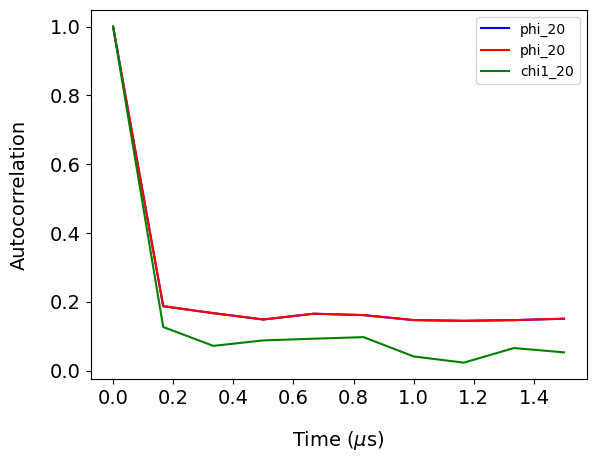

In [75]:
#Lets Calculate Some Correlation Times of Some Dihedral angles.
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

#time in microseconds
time=np.linspace(0,1000,trj.n_frames)


lags=range(10)
#C1C2bondlength[:,0]
phi20_acf=autocorr1(dihedral_dict['phi'][20],lags)
phi20_acf=autocorr1(dihedral_dict['phi'][20],lags)
chi20_acf=autocorr1(dihedral_dict['chi1'][20],lags)

plt.plot(time[lags],phi20_acf,color='b',label='phi_20')
plt.plot(time[lags],phi20_acf,color='r',label='phi_20')
plt.plot(time[lags],chi20_acf,color='g',label='chi1_20')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

In [53]:
#Lets Make a Contact Map
contact_maps = []
contact_distances = []
for i in range(1, 76):
    contact_map = []
    contact_distance = []
    for j in range(1, 76):
        if i == j:
            contacts = 0
        else:
            dist = md.compute_contacts(trj, [[i, j]])
            array = np.asarray(dist[0]).astype(float)
            distance = np.average(array)
            contact_distance.append(distance)
            contact = np.where(array < 0.5, 1, 0)
            contacts = np.average(contact)
        contact_map.append(contacts)
    contact_maps.append(contact_map)
    contact_distances.append(contact_distance)
final_map = np.asarray(contact_maps).astype(float)
final_distance = np.asarray(contact_distances).astype(float)


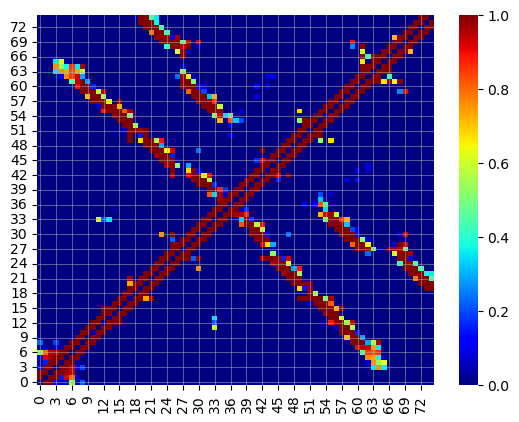

In [54]:
ax = sns.heatmap(final_map, vmin=0.0, vmax=1.0,cmap='jet')
ax.invert_yaxis()
ax.grid(which='both', alpha=0.5)


Lets think about some fun things we can do with this trajectory.  

Rubric (Completing the bolded tasks and attempting some additional tasks puts an assignment in the ~"P - B/B+" range, attempting and completing some additional more advanced tasks will earn a ~"HP - A/A-").  Very parital or incomplete attempts for the bolded questiosn is in the ~"LP / B-/C+"

Ideas:

**1.) Determine what is structural different about the "minor state" populated between 650-750us.  Can you make a visualization of the two states?** 

**2.)  Identify some dihedral angles that have very long correlation times? Can you your provide structural snapshots that explain why certain correlation times are longer?**

  More Advanced:
  
  2a) Can you calculate/ fit the correlation times? 
  
  2b) Can you write a loop to scan over all phi/psi/chi1/chi2 residues and identify residues with correlation times longer than a given threshold? 

3)Considering the minor state, can you find residues that have large changes in the distributions of backbone or sidechain dihedral angles?  Are there torsion angles with large differences in their correlation times between states?  Can you provide trajectory snapshots that explain why?

**4) Calculate the ciruclar correlation coefficients between phi and psi angles and reproduce the correlation map from below**  -Look into using a "mask" to eliminate some entries in the correlation matrix and make your plot prettier. 

5) Make a 2D map showing the populations of hydrogen bonds between different residues.

6) Compare the contact maps, dihedral correlations, and hydrogen bond populations between the major and minor states.

7) Compare the contact maps, dihedral correlations, and hydrogen bond populations for different subsets of PC space (ie PC1 is on the intevral [lower1,upper1] and PC2 is on the invertval [lower2,upper2]

7) Compute an visualize all-to-all RMSD calculation of the frames of this trajectory.  

8) Cluster the conformations of the trajectory in some way.  Perhaps consider using the all-to-all rmsd distances, or the the values of PCs.  (Consult https://mdtraj.org/1.9.4/examples/clustering.html or https://mdtraj.org/1.9.4/examples/centroids.html for examples)


9) Visualize the most populated clusters from your clustering analysis

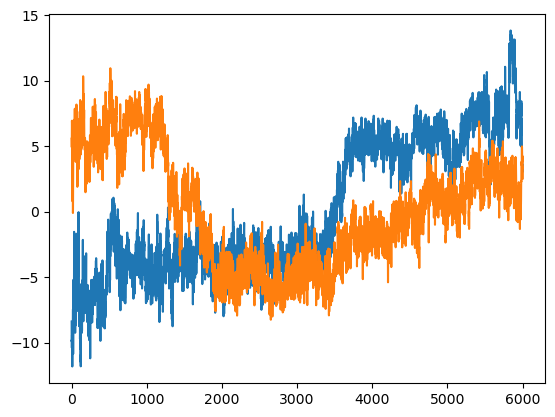

In [27]:
##1.) Determine what is structural different about the "minor state" populated between 650-750us. Can you make a visualization of the two states?
plt.plot(PC1)
plt.plot(PC2)

In [28]:
major_state = np.where((PC2 < 1.75) & (PC2 > -1.75))[0] 
minor_state = np.where((PC2 < 10) & (PC2 > 5.5))[0] 
major_state_reduced = major_state[::15]

In [29]:
print(major_state_reduced)

[  11 1299 1314 1355 1373 1388 1407 1422 1444 1461 1483 1505 1526 1553
 1570 1585 1614 1644 1662 1680 1698 1719 1752 1827 1853 3540 3636 3728
 3746 3766 3784 3837 3890 3908 3952 3979 3995 4019 4042 4093 4113 4145
 4194 4255 4271 4290 4305 4325 4340 4356 4372 4387 4408 4423 4440 4456
 4471 4487 4502 4519 4539 4555 4573 4589 4610 4638 4653 4668 4684 4700
 4720 4752 4786 4821 4836 4864 4879 4897 4916 4939 4957 4972 4994 5011
 5028 5057 5073 5089 5111 5127 5143 5159 5176 5209 5225 5243 5283 5323
 5439 5474 5548 5680 5716 5789 5810 5834 5885 5931 5946 5962 5978]


In [30]:
print(minor_state)

[   0    3    4    5    6   22   24   25   26   27   28   29   30   31
   32   34   35   37   38   39   40   41   42   43   49   50   56   57
   58   59   60   61   62   63   64   65   66   67   68   71   87   90
  101  102  107  108  109  110  111  112  113  114  115  116  117  118
  119  123  124  125  129  131  132  133  137  139  141  142  143  145
  146  147  148  149  150  151  152  155  156  157  158  159  160  161
  162  163  164  165  166  167  168  176  178  244  255  256  257  259
  260  261  262  263  264  267  268  269  272  273  275  277  278  279
  280  281  282  283  284  285  286  287  288  289  290  291  297  298
  299  300  301  302  303  305  306  307  308  309  310  311  312  313
  314  315  316  317  319  320  321  324  326  327  340  341  343  345
  350  358  362  364  365  366  369  370  371  381  394  396  397  398
  402  403  417  418  419  420  421  422  423  424  425  428  429  430
  433  434  436  437  438  439  441  442  443  444  445  446  447  449
  450 

#Q1
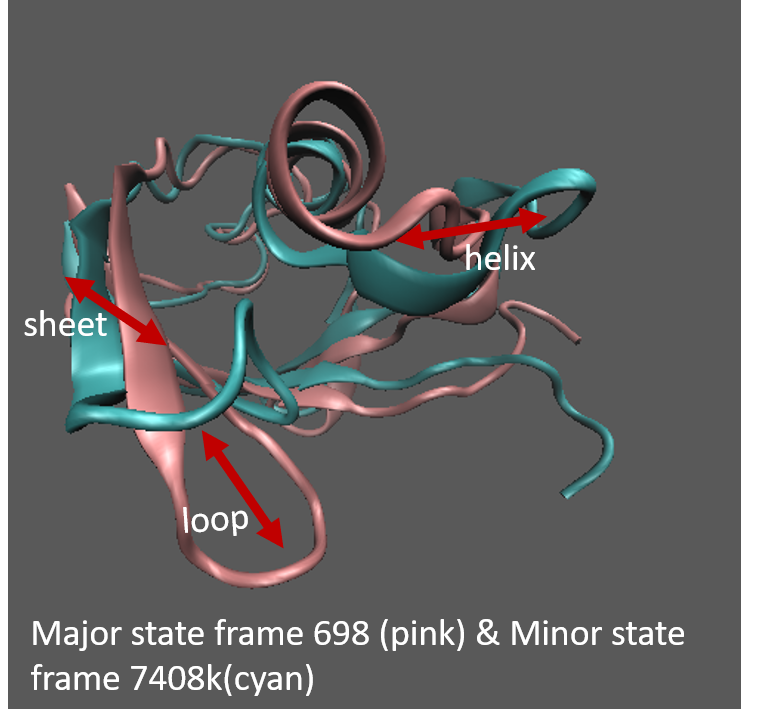

#Q1
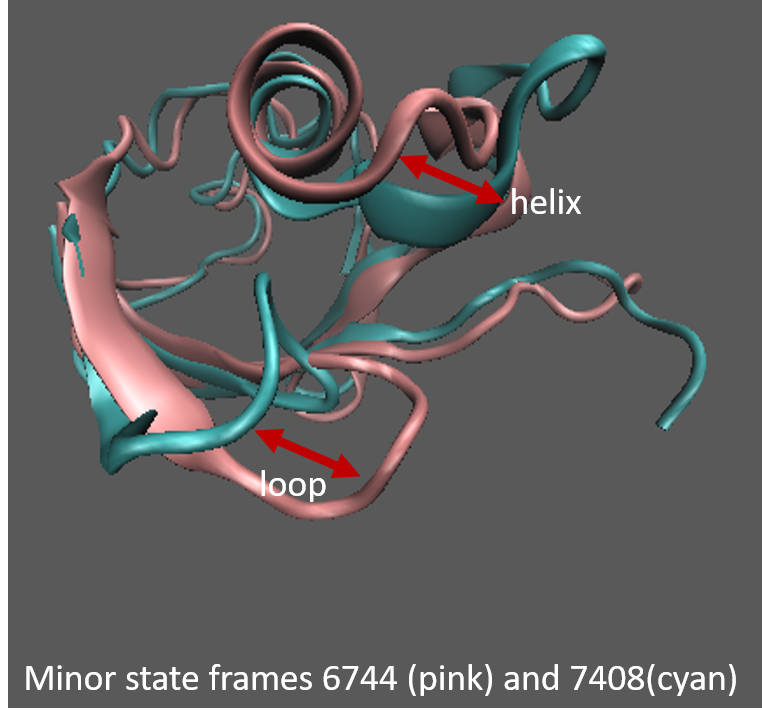

Here is the equation used to calculate circular correlation coefficients for dihedral angles

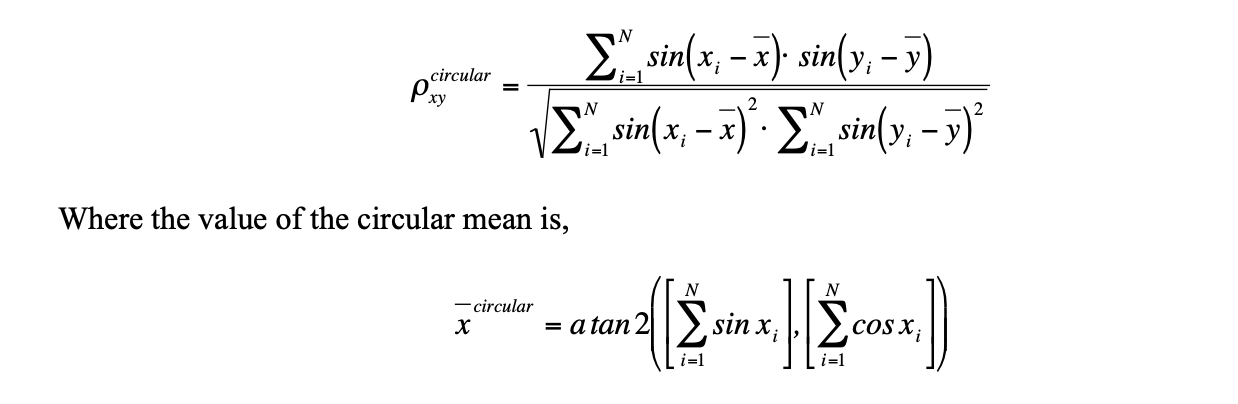


Lets calculate some correlations between dihedrals found in the paper: 


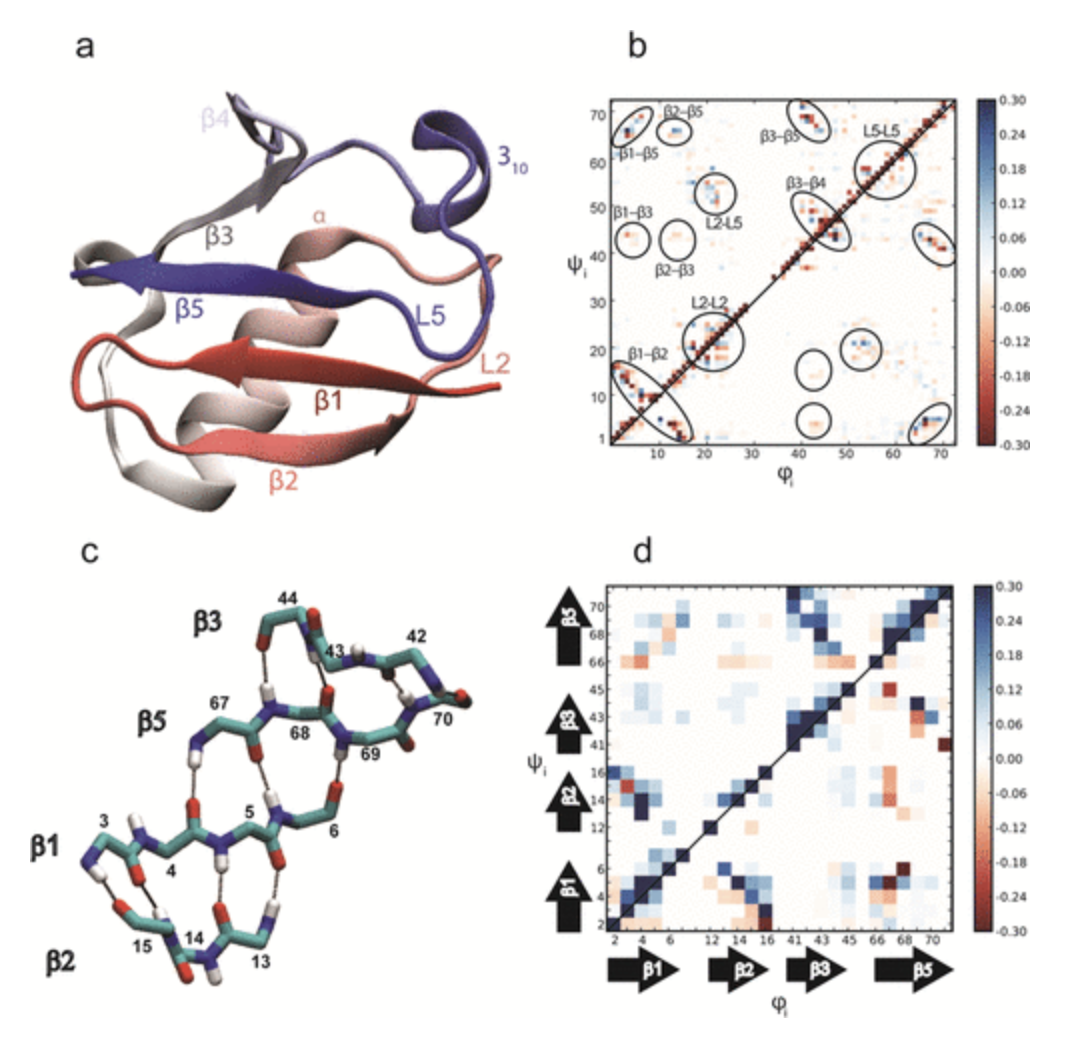

In [31]:
np.argmax(rg)

16

Lags represent the time intervals over which the autocorrelation is calculated (range here is 0 -9).
#[2] eg is the index 2 of the phi angle which is same as the 3rd phi dihedral angle
To identify dihedral angles that have very long correlation times using autocorrelation analysis, you can examine the decay of the autocorrelation function. Dihedral angles with slower decay in autocorrelation likely have longer correlation times.

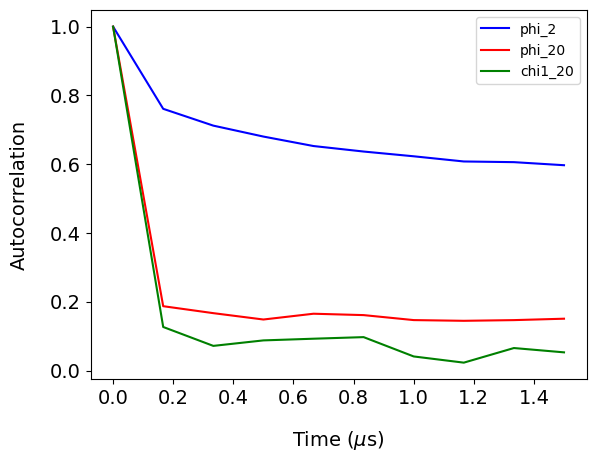

In [32]:
def autocorr1(x, lags):
    '''numpy.corrcoef, partial'''
    corr = [1. if l == 0 else np.corrcoef(x[l:], x[:-l])[0][1] for l in lags]
    return np.array(corr)

# Define time in microseconds
time = np.linspace(0, 1000, trj.n_frames)

# Define the lags for autocorrelation analysis
lags = range(10)

# Calculate autocorrelation for specific dihedral angles
phi2_acf = autocorr1(dihedral_dict['phi'][2], lags)
phi20_acf = autocorr1(dihedral_dict['phi'][20], lags)
chi20_acf = autocorr1(dihedral_dict['chi1'][20], lags)

# Plot autocorrelation functions
plt.plot(time[lags], phi2_acf, color='b', label='phi_2')
plt.plot(time[lags], phi20_acf, color='r', label='phi_20')
plt.plot(time[lags], chi20_acf, color='g', label='chi1_20')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()


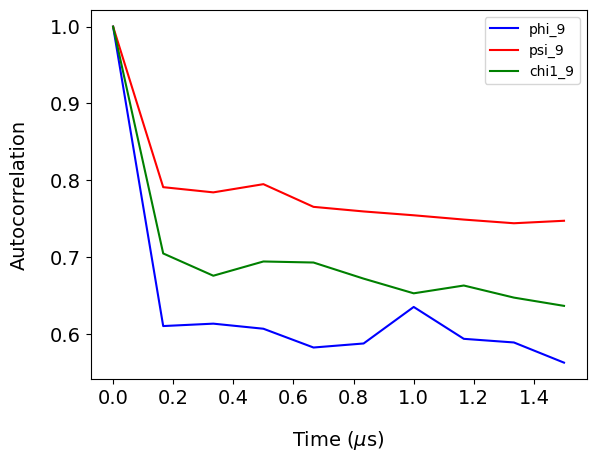

In [33]:
###### 2.) Identify some dihedral angles that have very long correlation times? Can you your provide structural snapshots that explain why certain correlation times are longer?
#Lets Calculate Some Correlation Times of Some Dihedral angles.
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

#time in microseconds
time=np.linspace(0,1000,trj.n_frames)


lags=range(10)
#C1C2bondlength[:,0]
phi9_acf=autocorr1(dihedral_dict['phi'][9],lags) #acf = autocorrelation fun
psi9_acf=autocorr1(dihedral_dict['psi'][9],lags)
chi9_acf=autocorr1(dihedral_dict['chi1'][9],lags)

plt.plot(time[lags],phi9_acf,color='b',label='phi_9')
plt.plot(time[lags],psi9_acf,color='r',label='psi_9')
plt.plot(time[lags],chi9_acf,color='g',label='chi1_9')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

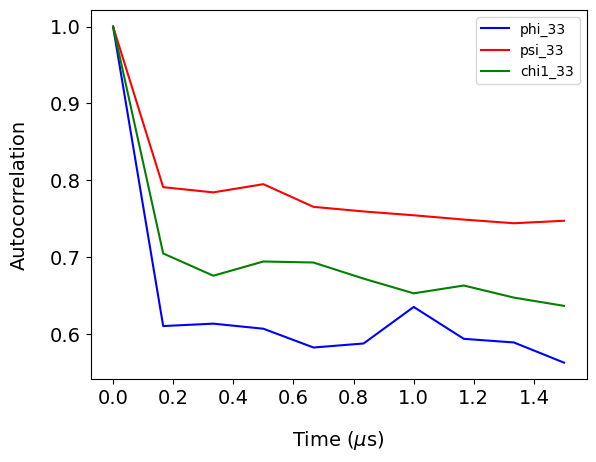

In [34]:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

#time in microseconds
time=np.linspace(0,1000,trj.n_frames)


lags=range(10)
#C1C2bondlength[:,0]
phi33_acf=autocorr1(dihedral_dict['phi'][9],lags) #acf = autocorrelation fun
psi33_acf=autocorr1(dihedral_dict['psi'][9],lags)
chi33_acf=autocorr1(dihedral_dict['chi1'][9],lags)

plt.plot(time[lags],phi33_acf,color='b',label='phi_33')
plt.plot(time[lags],psi33_acf,color='r',label='psi_33')
plt.plot(time[lags],chi33_acf,color='g',label='chi1_33')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

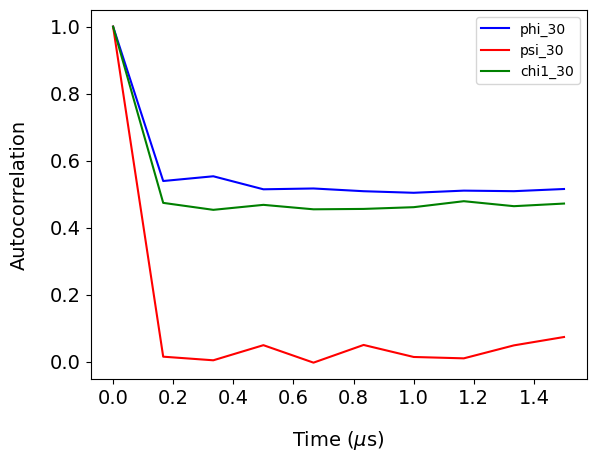

In [35]:
###### 2.) Identify some dihedral angles that have very long correlation times? Can you your provide structural snapshots that explain why certain correlation times are longer?
#Lets Calculate Some Correlation Times of Some Dihedral angles.
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

#time in microseconds
time=np.linspace(0,1000,trj.n_frames)


lags=range(10)
#C1C2bondlength[:,0]
phi30_acf=autocorr1(dihedral_dict['phi'][30],lags) #acf = autocorrelation fun
psi30_acf=autocorr1(dihedral_dict['psi'][30],lags)
chi30_acf=autocorr1(dihedral_dict['chi1'][30],lags)

plt.plot(time[lags],phi30_acf,color='b',label='phi_30')
plt.plot(time[lags],psi30_acf,color='r',label='psi_30')
plt.plot(time[lags],chi30_acf,color='g',label='chi1_30')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

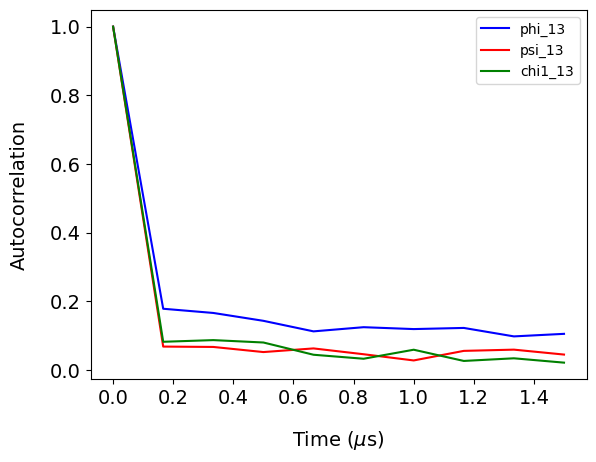

In [36]:
def autocorr1(x,lags):
    '''numpy.corrcoef, partial'''
    corr=[1. if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

#time in microseconds
time=np.linspace(0,1000,trj.n_frames)


lags=range(10)
#C1C2bondlength[:,0]
phi13_acf=autocorr1(dihedral_dict['phi'][13],lags) #acf = autocorrelation fun
psi13_acf=autocorr1(dihedral_dict['psi'][13],lags)
chi13_acf=autocorr1(dihedral_dict['chi1'][13],lags)

plt.plot(time[lags],phi13_acf,color='b',label='phi_13')
plt.plot(time[lags],psi13_acf,color='r',label='psi_13')
plt.plot(time[lags],chi13_acf,color='g',label='chi1_13')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

#structural snapshots that explain why certain correlation times are longer
![residues%20with%20long%20correlation%20times%289,13,30%20&33%29%20;%20residue%20with%20short%20correlation%20time%20(52).png](attachment:residues%20with%20long%20correlation%20times%289,13,30%20&33%29%20;%20residue%20with%20short%20correlation%20time%20(52).png)

Long correlation times greater than 0.2(threshold) were observed for residues 9, 13, 30 and 33. Resid 52 has a low correlation time less than 0.2 was included in this analysis as a comparison between the dynamic and undynamic regions of the protein. Red residues represent the minor state whilst blue residues represent the major state. Residues within the major state are observed to be clustered together and mostly pointed in the same direction across different frames. Meanwhile, residues in the minor state are observed to be in varying positions across different frames. Also the the loops, beta sheets and helices are observed to be in a more relaxed and open or turned in dfferent direction as observed for resids 9, 13, 30 and 33. Observations for secondary structure around Residue 52 shows a more compact or clustering of the loops together whether in the minor or major states. 

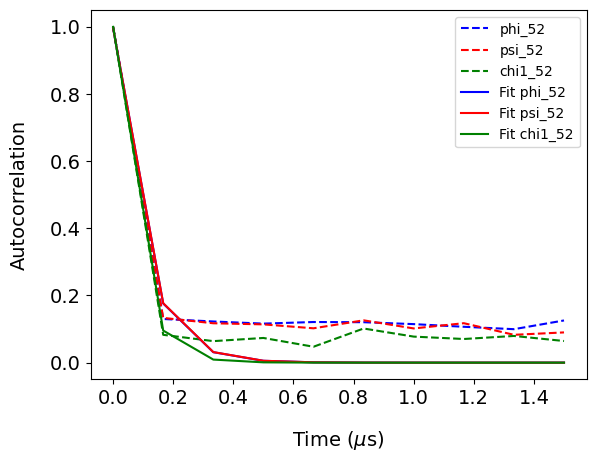

Correlation times:
phi_52: 0.09621214209169317
psi_52: 0.09650382967341632
chi1_52: 0.07100290078184099


In [37]:
#2a Can you calculate/ fit the correlation times
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def exponential_decay(t, tau, A):
    """Exponential decay function"""
    return A * np.exp(-t / tau)

def autocorr1(x, lags):
    '''numpy.corrcoef, partial'''
    corr = [1. if l == 0 else np.corrcoef(x[l:], x[:-l])[0][1] for l in lags]
    return np.array(corr)

# Define time in microseconds
time = np.linspace(0, 1000, trj.n_frames)

# Define the lags for autocorrelation analysis
lags = range(10)

# Calculate autocorrelation for specific dihedral angles
phi52_acf = autocorr1(dihedral_dict['phi'][52], lags)
psi52_acf = autocorr1(dihedral_dict['psi'][52], lags)
chi52_acf = autocorr1(dihedral_dict['chi1'][52], lags)

# Fit exponential decay curve to autocorrelation data
popt_phi52, pcov_phi52 = curve_fit(exponential_decay, time[lags], phi52_acf)
popt_psi52, pcov_psi52 = curve_fit(exponential_decay, time[lags], psi52_acf)
popt_chi52, pcov_chi52 = curve_fit(exponential_decay, time[lags], chi52_acf)

# Plot autocorrelation functions against lag time
plt.plot(time[lags], phi52_acf, 'b--', label='phi_52')
plt.plot(time[lags], psi52_acf, 'r--', label='psi_52')
plt.plot(time[lags], chi52_acf, 'g--', label='chi1_52')

# Plot fitted curves
plt.plot(time[lags], exponential_decay(time[lags], *popt_phi52), 'b-', label='Fit phi_52')
plt.plot(time[lags], exponential_decay(time[lags], *popt_psi52), 'r-', label='Fit psi_52')
plt.plot(time[lags], exponential_decay(time[lags], *popt_chi52), 'g-', label='Fit chi1_52')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

# Extract correlation times from fitted parameters
tau_phi52 = popt_phi52[0]
tau_psi52 = popt_psi52[0]
tau_chi52 = popt_chi52[0]

print("Correlation times:")
print("phi_52:", tau_phi52)
print("psi_52:", tau_psi52)
print("chi1_52:", tau_chi52)


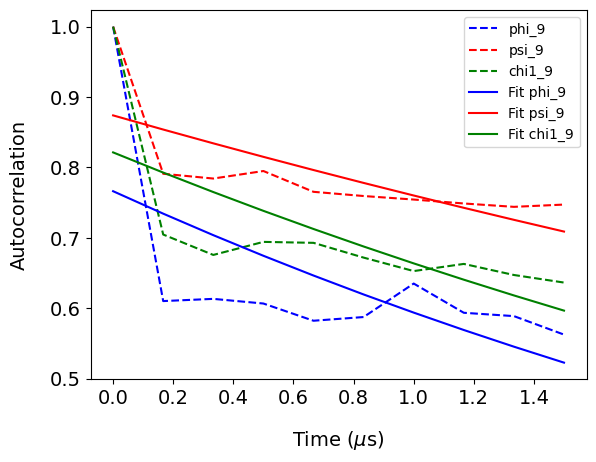

Correlation times:
phi_9: 3.9241346915246695
psi_9: 7.171275719951562
chi1_9: 4.6943361207871535


In [38]:
# Calculate autocorrelation for specific dihedral angles
phi9_acf = autocorr1(dihedral_dict['phi'][9], lags)
psi9_acf = autocorr1(dihedral_dict['psi'][9], lags)
chi9_acf = autocorr1(dihedral_dict['chi1'][9], lags)

# Fit exponential decay curve to autocorrelation data
popt_phi9, pcov_phi9 = curve_fit(exponential_decay, time[lags], phi9_acf)
popt_psi9, pcov_psi9 = curve_fit(exponential_decay, time[lags], psi9_acf)
popt_chi9, pcov_chi9 = curve_fit(exponential_decay, time[lags], chi9_acf)

# Plot autocorrelation functions against lag time
plt.plot(time[lags], phi9_acf, 'b--', label='phi_9')
plt.plot(time[lags], psi9_acf, 'r--', label='psi_9')
plt.plot(time[lags], chi9_acf, 'g--', label='chi1_9')

# Plot fitted curves
plt.plot(time[lags], exponential_decay(time[lags], *popt_phi9), 'b-', label='Fit phi_9')
plt.plot(time[lags], exponential_decay(time[lags], *popt_psi9), 'r-', label='Fit psi_9')
plt.plot(time[lags], exponential_decay(time[lags], *popt_chi9), 'g-', label='Fit chi1_9')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

# Extract correlation times from fitted parameters
tau_phi9 = popt_phi9[0]
tau_psi9 = popt_psi9[0]
tau_chi9 = popt_chi9[0]

print("Correlation times:")
print("phi_9:", tau_phi9)
print("psi_9:", tau_psi9)
print("chi1_9:", tau_chi9)


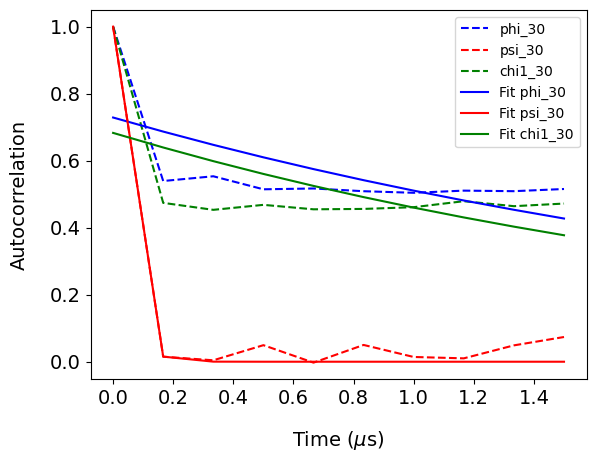

Correlation times:
phi_13: 2.810702238680385
psi_13: 0.03981306328625109
chi1_13: 2.5299925876854865


In [39]:
# Calculate autocorrelation for specific dihedral angles
phi30_acf = autocorr1(dihedral_dict['phi'][30], lags)
psi30_acf = autocorr1(dihedral_dict['psi'][30], lags)
chi30_acf = autocorr1(dihedral_dict['chi1'][30], lags)

# Fit exponential decay curve to autocorrelation data
popt_phi30, pcov_phi30 = curve_fit(exponential_decay, time[lags], phi30_acf)
popt_psi30, pcov_psi30 = curve_fit(exponential_decay, time[lags], psi30_acf)
popt_chi30, pcov_chi30 = curve_fit(exponential_decay, time[lags], chi30_acf)

# Plot autocorrelation functions against lag time
plt.plot(time[lags], phi30_acf, 'b--', label='phi_30')
plt.plot(time[lags], psi30_acf, 'r--', label='psi_30')
plt.plot(time[lags], chi30_acf, 'g--', label='chi1_30')

# Plot fitted curves
plt.plot(time[lags], exponential_decay(time[lags], *popt_phi30), 'b-', label='Fit phi_30')
plt.plot(time[lags], exponential_decay(time[lags], *popt_psi30), 'r-', label='Fit psi_30')
plt.plot(time[lags], exponential_decay(time[lags], *popt_chi30), 'g-', label='Fit chi1_30')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

# Extract correlation times from fitted parameters
tau_phi30 = popt_phi30[0]
tau_psi30 = popt_psi30[0]
tau_chi30 = popt_chi30[0]

print("Correlation times:")
print("phi_13:", tau_phi30)
print("psi_13:", tau_psi30)
print("chi1_13:", tau_chi30)


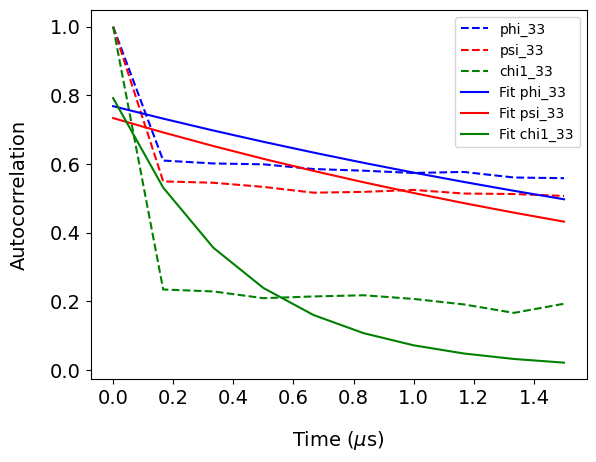

Correlation times:
phi_33: 3.450180581938464
psi_33: 2.835143014510702
chi1_33: 0.4176370010512826


In [40]:
# Calculate autocorrelation for specific dihedral angles
phi33_acf = autocorr1(dihedral_dict['phi'][33], lags)
psi33_acf = autocorr1(dihedral_dict['psi'][33], lags)
chi33_acf = autocorr1(dihedral_dict['chi1'][33], lags)

# Fit exponential decay curve to autocorrelation data
popt_phi33, pcov_phi33 = curve_fit(exponential_decay, time[lags], phi33_acf)
popt_psi33, pcov_psi33 = curve_fit(exponential_decay, time[lags], psi33_acf)
popt_chi33, pcov_chi33 = curve_fit(exponential_decay, time[lags], chi33_acf)

# Plot autocorrelation functions against lag time
plt.plot(time[lags], phi33_acf, 'b--', label='phi_33')
plt.plot(time[lags], psi33_acf, 'r--', label='psi_33')
plt.plot(time[lags], chi33_acf, 'g--', label='chi1_33')

# Plot fitted curves
plt.plot(time[lags], exponential_decay(time[lags], *popt_phi33), 'b-', label='Fit phi_33')
plt.plot(time[lags], exponential_decay(time[lags], *popt_psi33), 'r-', label='Fit psi_33')
plt.plot(time[lags], exponential_decay(time[lags], *popt_chi33), 'g-', label='Fit chi1_33')

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()

# Extract correlation times from fitted parameters
tau_phi33 = popt_phi33[0]
tau_psi33 = popt_psi33[0]
tau_chi33 = popt_chi33[0]

print("Correlation times:")
print("phi_33:", tau_phi33)
print("psi_33:", tau_psi33)
print("chi1_33:", tau_chi33)


In [42]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define autocorrelation function
def autocorr1(x, lags):
    '''numpy.corrcoef, partial'''
    corr = [1. if l == 0 else np.corrcoef(x[l:], x[:-l])[0][1] for l in lags]
    return np.array(corr)

# Generate time values
time = np.linspace(0, 1000, trj.n_frames)

# Define lags for autocorrelation analysis
lags = range(10)

auto_corr_time_dict = {}
# Iterate over each residue in residues array
for angle in dihedral_dict.keys():
    for residue in dihedral_dict[angle].keys():
        # Calculate autocorrelation for each dihedral angle
        angle_acf = autocorr1(dihedral_dict[angle].get(residue, np.zeros(trj.n_frames)), lags)
    
        # Define a linear function for regression
        def linear_func(t, m, c):
            return m * t + c

        # Perform linear regression for each autocorrelation curve using the first two lag values
        linfit_angle, _ = curve_fit(linear_func, time[lags[:2]], angle_acf[:2])

        # Print the slopes
        print(f"Autocorrelation time for {angle} at residues {residue}: {-1/linfit_angle[0]}")
        if angle not in auto_corr_time_dict.keys(): \
            auto_corr_time_dict[angle]={}
        auto_corr_time_dict[angle][residue] = - 1/linfit_angle[0]
        

/var/folders/np/p_8hx6w53z9gtvwkrthry9x00000gn/T/ipykernel_23488/1113682499.py:28: OptimizeWarning: Covariance of the parameters could not be estimated
  linfit_angle, _ = curve_fit(linear_func, time[lags[:2]], angle_acf[:2])


Autocorrelation time for phi at residues 2: 0.6975660867056767
Autocorrelation time for phi at residues 3: 0.3397505928153752
Autocorrelation time for phi at residues 4: 0.47082814448519716
Autocorrelation time for phi at residues 5: 0.28751282742427803
Autocorrelation time for phi at residues 6: 0.2580530337401749
Autocorrelation time for phi at residues 7: 0.4623697332189001
Autocorrelation time for phi at residues 8: 0.28658079397272956
Autocorrelation time for phi at residues 9: 0.4277188614077311
Autocorrelation time for phi at residues 10: 1.2817371769822554
Autocorrelation time for phi at residues 11: 0.2412039167248422
Autocorrelation time for phi at residues 12: 0.18303769433696573
Autocorrelation time for phi at residues 13: 0.2028399322006409
Autocorrelation time for phi at residues 14: 0.19296923589592244
Autocorrelation time for phi at residues 15: 0.20098265680131902
Autocorrelation time for phi at residues 16: 0.21047118636146422
Autocorrelation time for phi at residues 

In [43]:
dihedral_dict['phi'].keys()

dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 

In [44]:
dihedral_dict['psi'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [45]:
dihedral_dict['chi1'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 2

In [46]:
dihedral_dict['chi2'].keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 29, 32, 33, 35, 37, 38, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 60, 61, 62, 63, 64, 65, 69, 70, 71, 72, 74, 75, 76, 79, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 94, 96, 98, 103, 104, 105, 107, 109, 110, 113, 115, 116, 119, 120, 122, 123, 125, 126, 127, 128, 129, 130, 132, 133, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 161, 162, 164, 165, 167, 168, 170, 171, 172, 173, 174, 176, 177, 178, 180, 182, 183, 185, 186, 187, 188, 191, 192, 194, 195, 196, 197, 198, 199, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 213, 214, 216, 219, 220, 221, 222, 223, 224, 226, 227, 228, 230, 231, 233, 234, 235, 237, 242, 243, 244, 245, 246, 247, 249, 250, 251, 253, 255, 256, 257, 258, 259, 261, 262, 263, 265])

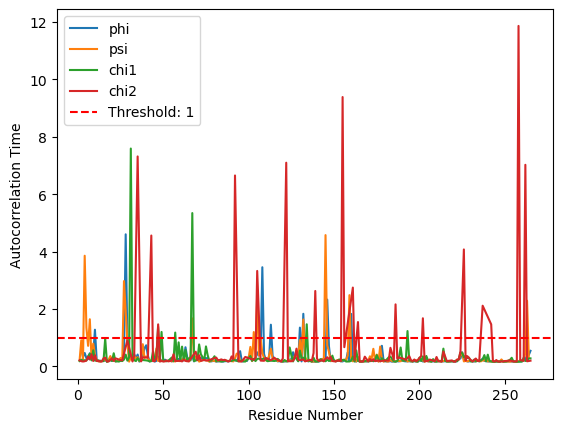

In [55]:
import matplotlib.pyplot as plt

#define threshold
threshold = 1

for angle in auto_corr_time_dict.keys():
    a_corr_arr = []
    residues = list(auto_corr_time_dict[angle].keys())
    for residue in residues:
        a_corr_arr.append(auto_corr_time_dict[angle][residue])
    plt.plot(residues, a_corr_arr, label=angle)

plt.legend()
plt.xlabel('Residue Number')  # Label for the x-axis
plt.ylabel('Autocorrelation Time')  # Label for the y-axis
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')  # Add a horizontal line for the threshold
plt.legend()
plt.show()


/var/folders/np/p_8hx6w53z9gtvwkrthry9x00000gn/T/ipykernel_23488/3639382679.py:23: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_, pcov_ = curve_fit(linear_regression, time[lags][:2], np.log(dihedral_acf[:2]))


Residue phi_2 has correlation time longer than 0.2 microseconds: 0.6104302000343896 microseconds.
Residue phi_3 has correlation time longer than 0.2 microseconds: 0.2471027353315845 microseconds.
Residue phi_4 has correlation time longer than 0.2 microseconds: 0.381429343009865 microseconds.
Residue phi_7 has correlation time longer than 0.2 microseconds: 0.3728323038093619 microseconds.
Residue phi_9 has correlation time longer than 0.2 microseconds: 0.33753916011284935 microseconds.
Residue phi_10 has correlation time longer than 0.2 microseconds: 1.1964552056909796 microseconds.
Residue phi_27 has correlation time longer than 0.2 microseconds: 0.318326814566008 microseconds.
Residue phi_28 has correlation time longer than 0.2 microseconds: 4.521201373826566 microseconds.
Residue phi_29 has correlation time longer than 0.2 microseconds: 0.7693350608816758 microseconds.
Residue phi_30 has correlation time longer than 0.2 microseconds: 0.26996566076792494 microseconds.
Residue phi_31 h

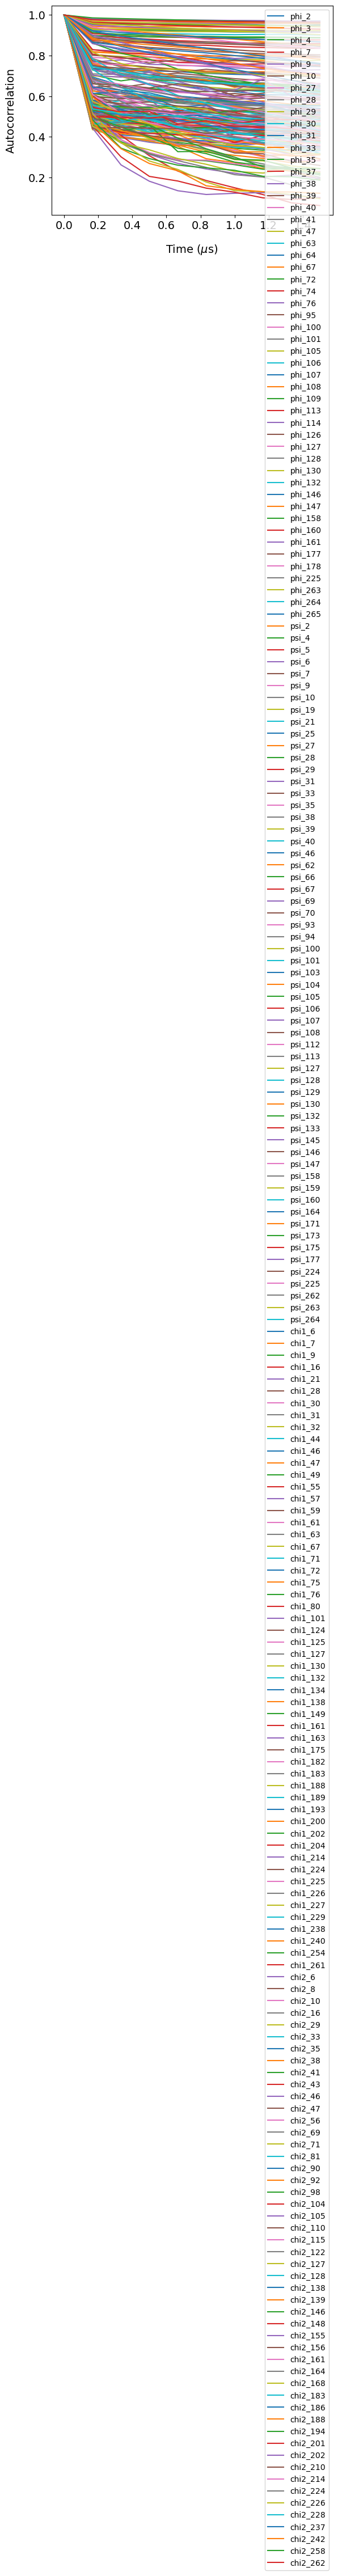

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define linear regression function
def linear_regression(x, m, c):
    return m * x + c

# Define your threshold value here (in microseconds)
threshold = 0.2

# List to store the residues with autocorrelation times greater than the threshold
residues_above_threshold = []

# Loop over all phi/psi/chi1/chi2 residues
for residue_type in ['phi', 'psi', 'chi1', 'chi2']:
    for residue_number, dihedral_data in dihedral_dict[residue_type].items():  
        # Calculate autocorrelation for each dihedral angle
        dihedral_acf = autocorr1(dihedral_data, lags)
        # Calculate correlation time (e.g., time for autocorrelation to decay to 0.1)
        correlation_time = 0
        if dihedral_acf[1] > 0: 
            popt_, pcov_ = curve_fit(linear_regression, time[lags][:2], np.log(dihedral_acf[:2]))
            correlation_time = -1/popt_[0]
            
            if correlation_time > threshold:
                residues_above_threshold.append((residue_type, residue_number, correlation_time))
                print(f"Residue {residue_type}_{residue_number} has correlation time longer than {threshold} microseconds: {correlation_time} microseconds.")

# Plotting only residues with correlation time greater than the threshold
for residue_type, residue_number, correlation_time in residues_above_threshold:
    dihedral_acf = autocorr1(dihedral_dict[residue_type][residue_number], lags)
    plt.plot(time[lags], dihedral_acf, label=f"{residue_type}_{residue_number}")

plt.legend()
plt.xlabel("Time ($\mu$s)", size=14, labelpad=15)
plt.ylabel("Autocorrelation", size=14, labelpad=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(size='14')
plt.yticks(size='14')
plt.show()


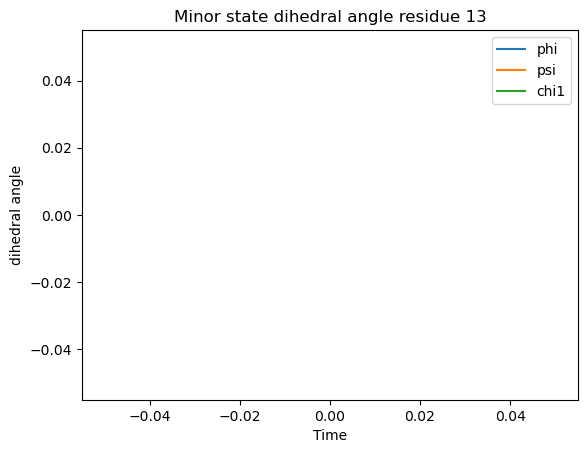

In [49]:
#Q3-Considering the minor state, can you find residues that have large changes in the distributions of backbone or sidechain dihedral angles? Are there torsion angles with large differences in their correlation times between states? Can you provide trajectory snapshots that explain why?

residue= 13
plt.plot(time[6500:7500:2], dihedral_dict['phi'][13][6500:7500:2], label='phi')
plt.plot(time[6500:7500:2], dihedral_dict['psi'][13][6500:7500:2], label='psi')
plt.plot(time[6500:7500:2], dihedral_dict['chi1'][13][6500:7500:2], label='chi1')

plt.legend()
plt.xlabel('Time')
plt.ylabel('dihedral angle')
plt.title('Minor state dihedral angle residue 13')
plt.legend()
plt.show()

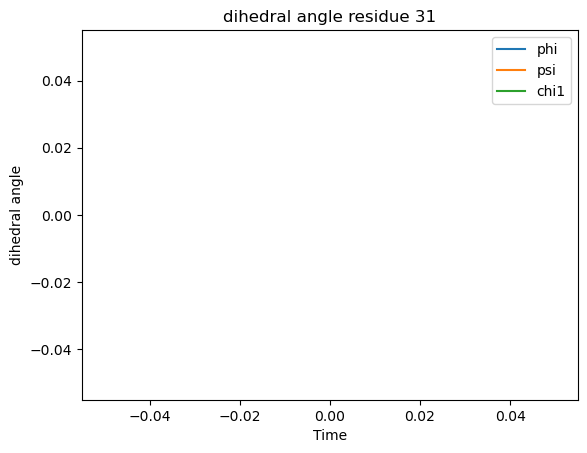

In [50]:
residue= 31
plt.plot(time[6500:7500:2], dihedral_dict['phi'][31][6500:7500:2], label='phi')
plt.plot(time[6500:7500:2], dihedral_dict['psi'][31][6500:7500:2], label='psi')
plt.plot(time[6500:7500:2], dihedral_dict['chi1'][31][6500:7500:2], label='chi1')
plt.legend()
plt.xlabel('Time')
plt.ylabel('dihedral angle')
plt.title('dihedral angle residue 31')
plt.legend()
plt.show()

KeyError: 73

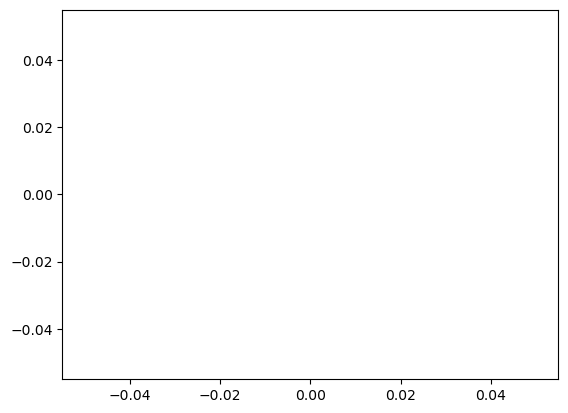

In [51]:
residue= 73
plt.plot(time[6500:7500:2], dihedral_dict['phi'][73][6500:7500:2], label='phi')
plt.plot(time[6500:7500:2], dihedral_dict['psi'][73][6500:7500:2], label='psi')
plt.plot(time[6500:7500:2], dihedral_dict['chi1'][73][6500:7500:2], label='chi1')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation residue 73')
plt.legend()
plt.show()

In [ ]:
residue= 9
plt.plot(time[6500:7500:2], dihedral_dict['phi'][9][6500:7500:2], label='phi')
plt.plot(time[6500:7500:2], dihedral_dict['psi'][9][6500:7500:2], label='psi')
plt.plot(time[6500:7500:2], dihedral_dict['chi1'][9][6500:7500:2], label='chi1')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation residue 9')
plt.legend()
plt.show()

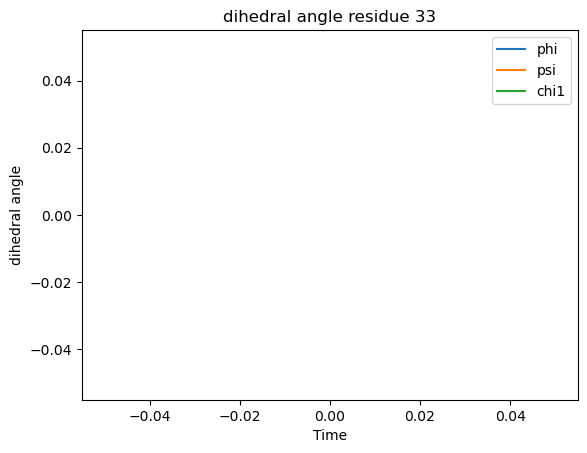

In [58]:
#Q3 - Considering the minor state, can you find residues that have large changes in the distributions of backbone or sidechain dihedral angles? Are there torsion angles with large differences in their correlation times between states? Can you provide trajectory snapshots that explain why?
# identified regions are in q2
#minor state
residue= 33
plt.plot(time[6500:7500:2], dihedral_dict['phi'][33][6500:7500:2], label='phi')
plt.plot(time[6500:7500:2], dihedral_dict['psi'][33][6500:7500:2], label='psi')
plt.plot(time[6500:7500:2], dihedral_dict['chi1'][33][6500:7500:2], label='chi1')
plt.legend()
plt.xlabel('Time')
plt.ylabel('dihedral angle')
plt.title('dihedral angle residue 33')
plt.legend()
plt.show()

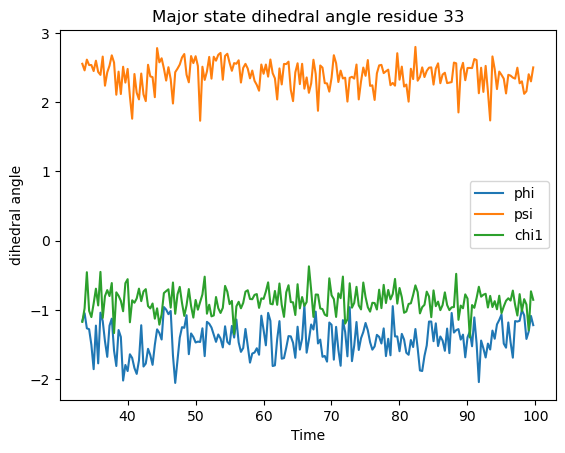

In [59]:
#Major state
residue= 33
plt.plot(time[200:600:2], dihedral_dict['phi'][33][200:600:2], label='phi')
plt.plot(time[200:600:2], dihedral_dict['psi'][33][200:600:2], label='psi')
plt.plot(time[200:600:2], dihedral_dict['chi1'][33][200:600:2], label='chi1')
plt.legend()
plt.xlabel('Time')
plt.ylabel('dihedral angle')
plt.title('Major state dihedral angle residue 33')
plt.legend()
plt.show()

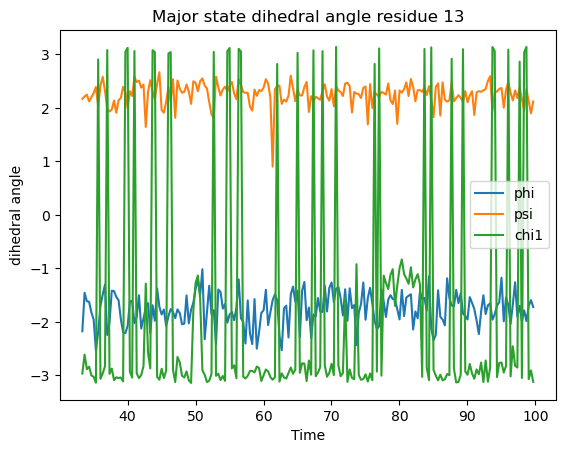

In [60]:
#Major state
residue= 13
plt.plot(time[200:600:2], dihedral_dict['phi'][13][200:600:2], label='phi')
plt.plot(time[200:600:2], dihedral_dict['psi'][13][200:600:2], label='psi')
plt.plot(time[200:600:2], dihedral_dict['chi1'][13][200:600:2], label='chi1')
plt.legend()
plt.xlabel('Time')
plt.ylabel('dihedral angle')
plt.title('Major state dihedral angle residue 13')
plt.legend()
plt.show()

#Q3 - Considering the minor state, can you find residues that have large changes in the distributions of backbone or sidechain dihedral angles? Are there torsion angles with large differences in their correlation times between states? Can you provide trajectory snapshots that explain why?
Residues of interest is resid 13 and 33
Residue 13 and 33 shows large changes in the dihedral angles as observed in the plots above. Also the calculated correlation times shown in Q2, shows large correlation time difference. From the images above, the residue 13 is in the minor state is oberved to be in the opposite direction to the major state whilst that of 33 is all over the place and this shows how dynamic the the minor states are, which can be attributed to high degrees of freedom at those sites


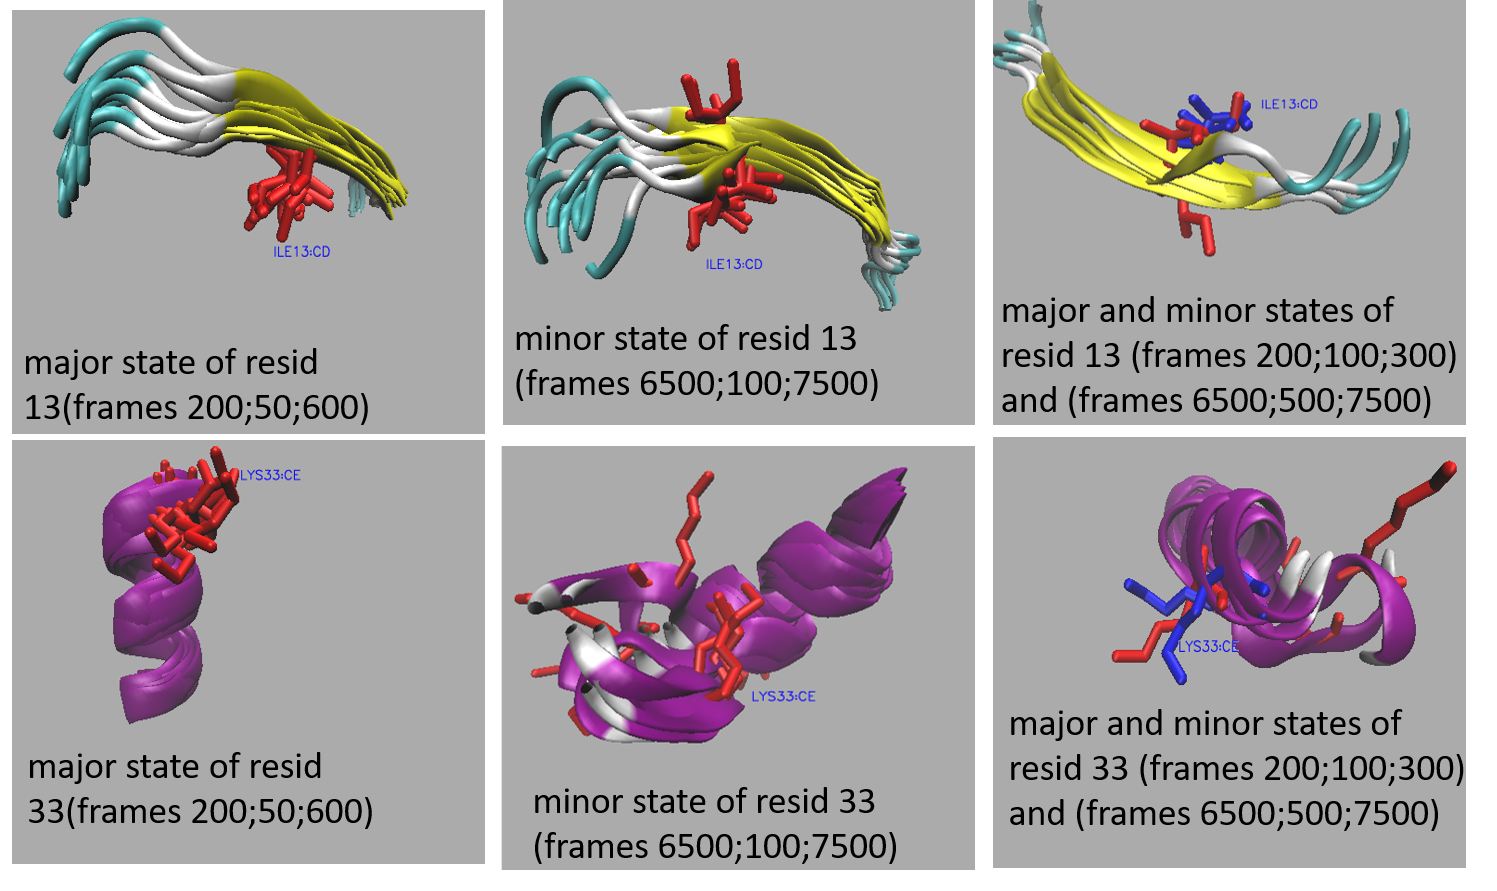

In [61]:
# 4) Calculate the ciruclar correlation coefficients between phi and psi angles and reproduce the correlation map from below -Look into using a "mask" to eliminate some entries in the correlation matrix and make your plot prettier.
def circular_mean(angle):
    return np.arctan2(np.sum(np.sin(angle)),np.sum(np.cos(angle)))


def circular_corr(phi,psi):
    cmean1=circular_mean(phi)
    cmean2=circular_mean(psi)
    numerator=(np.sum(np.sin(phi-cmean1)*np.sin(psi-cmean2)))
    denom=((np.sum(np.sin(phi-cmean1)**2)*np.sum(np.sin(psi-cmean2)**2))**.5)
    ccor=numerator/denom
    return ccor

In [62]:
# Make correlation contact map
correlation_maps = []
for i in range(2, 76):
    cor_map = []
    for j in range(2, 76):
        phi=dihedral_dict['phi'][i]
        psi=dihedral_dict['psi'][j]
        ccor=circular_corr(psi,phi)
        cor_map.append(ccor)
    correlation_maps.append(cor_map)
final_cor_map = np.asarray(correlation_maps).astype(float)
np.shape(final_cor_map)

(74, 74)

In [63]:
sequence=[]
for residue in trj.topology.residues:
    sequence.append(residue)
len(sequence)
seq_trunc=sequence[1:76]
#Lets Zero Out some of the Labels 
n=4
for i in range (0,75): 
  if (i % n !=0):
   seq_trunc[i]=''
print(seq_trunc)
print(sequence)

[LYS2, '', '', '', ASN6, '', '', '', GLU10, '', '', '', ILE14, '', '', '', ARG18, '', '', '', TYR22, '', '', '', TYR26, '', '', '', CYS30, '', '', '', VAL34, '', '', '', GLU38, '', '', '', THR42, '', '', '', ASN46, '', '', '', PHE50, '', '', '', GLY54, '', '', '', SER58, '', '', '', GLN62, '', '', '', SER66, '', '', '', PRO70, '', '', '', ILE74, '', '']
[MET1, LYS2, LEU3, LYS4, GLN5, ASN6, ILE7, GLU8, LYS9, GLU10, ILE11, ILE12, LYS13, ILE14, ASN15, ASN16, ILE17, ARG18, ILE19, HIS20, GLN21, TYR22, THR23, VAL24, LEU25, TYR26, THR27, SER28, ASN29, CYS30, THR31, ILE32, ASP33, VAL34, TYR35, THR36, LYS37, GLU38, GLY39, SER40, ASN41, THR42, TYR43, LEU44, ARG45, ASN46, GLU47, LEU48, ILE49, PHE50, LEU51, GLU52, ARG53, GLY54, ILE55, ASN56, ILE57, SER58, VAL59, ARG60, LEU61, GLN62, LYS63, LYS64, LYS65, SER66, THR67, VAL68, ASN69, PRO70, PHE71, ILE72, ALA73, ILE74, ARG75, LEU76, SER77, SER78, ASP79, THR80, LEU81, ARG82, ARG83, LEU84, LYS85, ASP86, ALA87, LEU88, MET89, ILE90, ILE91, TYR92, GLY93, I

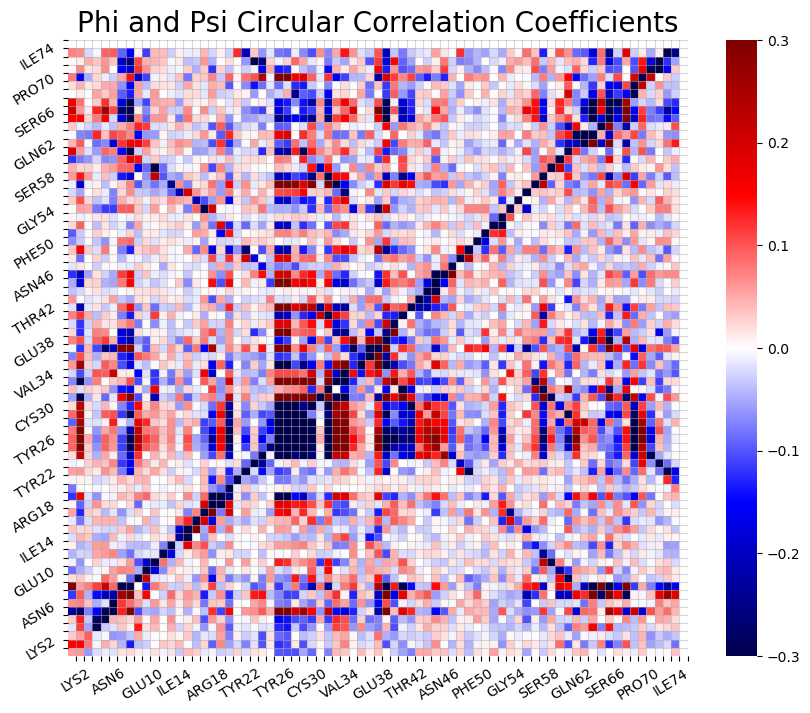

In [64]:
mask = np.zeros_like(final_cor_map)
zeros=np.where((final_cor_map<0.10) & (final_cor_map>-0.10))
mask[zeros] = True
plt.figure(figsize=(10, 8)) 
ax = sns.heatmap(final_cor_map, vmin=-0.3, vmax=0.3,cmap='seismic')
ax.invert_yaxis()
ax.grid(which='both', alpha=0.5)
ax.set_xticks(range(1,76))
ax.set_yticks(range(1,76))
ax.set_xticklabels(seq_trunc,rotation=32)
ax.set_yticklabels(seq_trunc,rotation=32)
ax.set_title('Phi and Psi Circular Correlation Coefficients', fontsize=20)
plt.show()

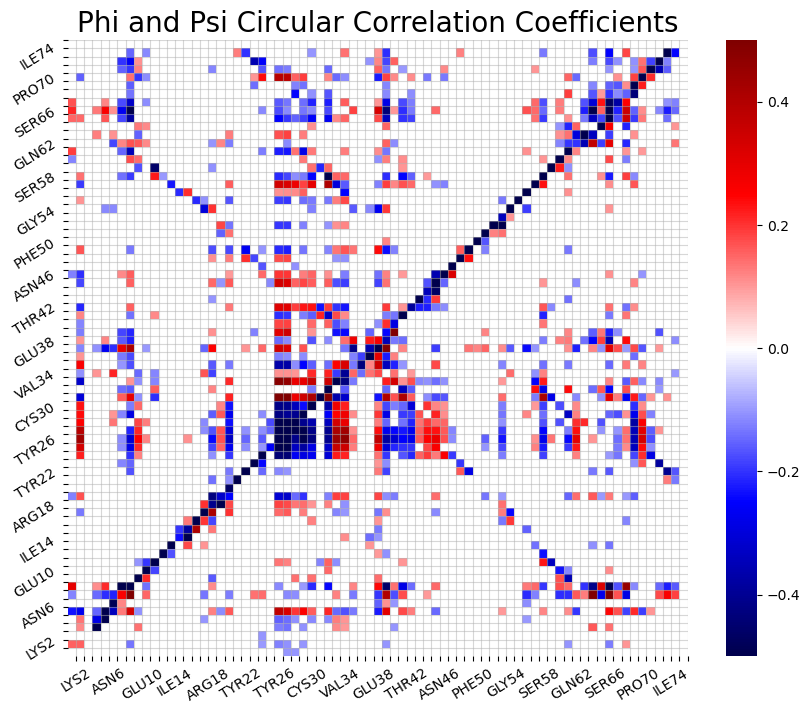

In [65]:
mask = np.zeros_like(final_cor_map)
zeros=np.where((final_cor_map<0.10) & (final_cor_map>-0.10))
mask[zeros] = True
plt.figure(figsize=(10, 8))
ax = sns.heatmap(final_cor_map,mask=mask, vmin=-0.5, vmax=0.5,cmap='seismic')
ax.invert_yaxis()
ax.grid(which='both', alpha=0.5)
ax.set_xticks(range(1,76))
ax.set_yticks(range(1,76))
ax.set_xticklabels(seq_trunc,rotation=32)
ax.set_yticklabels(seq_trunc,rotation=32)
ax.set_title('Phi and Psi Circular Correlation Coefficients', fontsize=20)
plt.show()

In [66]:
#Q5Make a 2D map showing the populations of hydrogen bonds between different residues.

hbonds = md.baker_hubbard(trj, periodic=False)
label = lambda hbond : '%s -- %s' % (trj.topology.atom(hbond[0]), trj.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))

LEU3-N -- GLU8-OE1
GLN5-N -- GLN5-OE1
ASN6-N -- LEU3-O
ASN6-N -- ASN6-OD1
ILE7-N -- LYS4-O
GLU8-N -- LYS4-O
LYS9-N -- GLU8-OE1
LYS9-N -- GLU8-OE2
GLU10-N -- GLU8-O
GLU10-N -- LYS63-O
ILE11-N -- GLU10-OE1
ILE11-N -- GLU10-OE2
ILE12-N -- LEU61-O
ILE14-N -- VAL59-O
ASN15-N -- PHE251-O
ASN16-N -- SER58-OG
ASN16-ND2 -- HIS250-O
ILE17-N -- ILE57-O
ILE19-N -- ILE55-O
HIS20-N -- ARG18-O
HIS20-N -- LIG266-O1
HIS20-N -- LIG266-O2
HIS20-NE2 -- GLU171-OE1
HIS20-NE2 -- GLU171-OE2
GLN21-N -- LIG266-O1
GLN21-N -- LIG266-O2
GLN21-NE2 -- LEU76-O
THR23-N -- LEU51-O
VAL24-N -- ILE74-O
LEU25-N -- ILE49-O
TYR26-N -- ILE72-O
THR27-N -- GLU47-O
SER28-N -- TYR26-O
ASN29-N -- SER28-OG
ASN29-N -- PRO70-O
ASN29-ND2 -- LYS65-O
ASN29-ND2 -- ASN69-O
CYS30-N -- THR27-O
CYS30-N -- SER28-O
CYS30-N -- PRO70-O
THR31-N -- GLN62-O
ILE32-N -- LEU44-O
ASP33-N -- ARG60-O
VAL34-N -- THR42-O
TYR35-N -- SER58-O
THR36-N -- ASN41-OD1
GLU38-N -- THR36-OG1
GLY39-N -- THR36-OG1
GLY39-N -- THR36-O
SER40-N -- LYS107-O
ASN41-N -- GLY39

In [67]:
np.shape(hbonds)

(440, 3)

In [68]:

for hbond in hbonds:
 donor = top.atom(hbond[0])
 acc = top.atom(hbond[2])
 print(hbond,donor,acc)

[ 41  42 143] LEU3-N GLU8-OE1
[82 83 93] GLN5-N GLN5-OE1
[ 99 100  59] ASN6-N LEU3-O
[ 99 100 107] ASN6-N ASN6-OD1
[113 114  81] ILE7-N LYS4-O
[132 133  81] GLU8-N LYS4-O
[147 148 143] LYS9-N GLU8-OE1
[147 148 144] LYS9-N GLU8-OE2
[169 170 146] GLU10-N GLU8-O
[ 169  170 1083] GLU10-N LYS63-O
[184 185 180] ILE11-N GLU10-OE1
[184 185 181] ILE11-N GLU10-OE2
[ 203  204 1044] ILE12-N LEU61-O
[ 244  245 1001] ILE14-N VAL59-O
[ 263  264 4152] ASN15-N PHE251-O
[277 278 982] ASN16-N SER58-OG
[ 286  288 4132] ASN16-ND2 HIS250-O
[291 292 974] ILE17-N ILE57-O
[334 335 941] ILE19-N ILE55-O
[353 354 333] HIS20-N ARG18-O
[ 353  354 4392] HIS20-N LIG266-O1
[ 353  354 4394] HIS20-N LIG266-O2
[ 364  365 2807] HIS20-NE2 GLU171-OE1
[ 364  365 2808] HIS20-NE2 GLU171-OE2
[ 370  371 4392] GLN21-N LIG266-O1
[ 370  371 4394] GLN21-N LIG266-O2
[ 382  384 1307] GLN21-NE2 LEU76-O
[408 409 876] THR23-N LEU51-O
[ 422  423 1264] VAL24-N ILE74-O
[438 439 837] LEU25-N ILE49-O
[ 457  458 1235] TYR26-N ILE72-O
[478 479 

In [69]:

# Assuming trj is properly defined before this point
# trj = ...

# Get the number of residues
num_residues = trj.n_residues

# Get the number of frames
frames = range(trj.n_frames)

# Initialize a square matrix to store the count of hydrogen bonds for each residue
hbond_population_matrix = np.zeros((num_residues, num_residues), dtype=int)

# Iterate over each frame
for frame in frames:
    # Calculate the hydrogen bonds for the current frame
    hbonds = md.baker_hubbard(trj[frame], periodic=False)
    
    # Iterate over each hydrogen bond in the current frame
    for hbond in hbonds:
        # Get the donor and acceptor atoms
        donor_index = hbond[0]
        acceptor_index = hbond[2]
        
        # Initialize variables to store donor and acceptor residues
        donor_residue = None
        acceptor_residue = None
        
        # Iterate over each residue to find the donor and acceptor residues
        for residue in trj.topology.residues:
            # Check if the donor atom belongs to this residue
            if donor_index in [atom.index for atom in residue.atoms]:
                donor_residue = residue.index
                
            # Check if the acceptor atom belongs to this residue
            if acceptor_index in [atom.index for atom in residue.atoms]:
                acceptor_residue = residue.index

        # Increment the count in the matrix if both donor and acceptor residues are found
        if donor_residue is not None and acceptor_residue is not None:
            hbond_population_matrix[donor_residue, acceptor_residue] += 1
            hbond_population_matrix[acceptor_residue, donor_residue] += 1

# Print the hydrogen bond matrix
print(hbond_population_matrix)

print(donor_index)
print(acceptor_index)
print(donor_residue)
print(acceptor_residue)
print(frames)

[[  2   3  82 ...   0   0   0]
 [  3   6 102 ...   0   0   0]
 [ 82 102   0 ...   0   0   0]
 ...
 [  0   0   0 ...  56 414   0]
 [  0   0   0 ... 414 544   0]
 [  0   0   0 ...   0   0   0]]
4394
333
265
17
range(0, 6000)


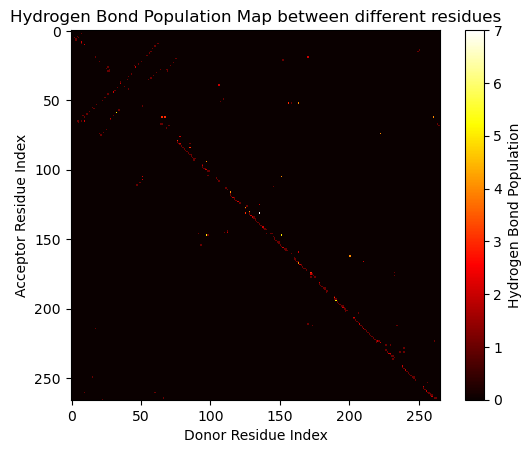

In [70]:
def calculate_hbond_population(trj):
    hbond_populations = np.zeros((trj.topology.n_residues, trj.topology.n_residues), dtype=int)
    for hbond in md.baker_hubbard(trj, periodic=False):
        donor_residue = trj.topology.atom(hbond[0]).residue.index
        acceptor_residue = trj.topology.atom(hbond[2]).residue.index
        hbond_populations[donor_residue, acceptor_residue] += 1
    return hbond_populations

def plot_hbond_map(hbond_populations):
    plt.imshow(hbond_populations, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Hydrogen Bond Population')
    plt.xlabel('Donor Residue Index')
    plt.ylabel('Acceptor Residue Index')
    plt.title('Hydrogen Bond Population Map between different residues')
    plt.show()

# Calculate hydrogen bond populations
hbond_populations = calculate_hbond_population(trj)

# Plot the hydrogen bond map
plot_hbond_map(hbond_populations)

In [71]:
print(hbond_populations)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


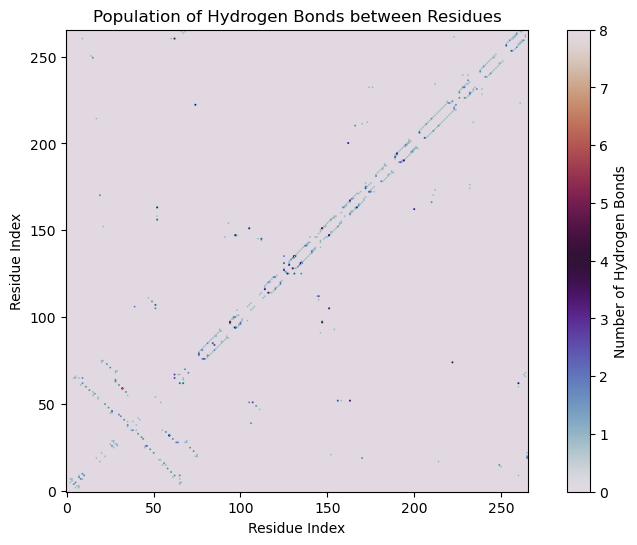

In [72]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Calculate hydrogen bonds
hbonds = md.baker_hubbard(trj, periodic=False)

# Get the maximum residue index
max_residue_index = max(trj.topology.residue(i).index for i in range(trj.n_residues)) + 1

# Initialize a matrix to store the count of hydrogen bonds for each residue
residue_hbond_count = np.zeros((max_residue_index, max_residue_index))

# Loop through each hydrogen bond
for hbond in hbonds:
    # Get the indices of the atoms involved in the hydrogen bond
    donor_index = hbond[0]
    acceptor_index = hbond[2]
    
    # Get the residue indices of the donor and acceptor atoms
    donor_residue_index = trj.topology.atom(donor_index).residue.index
    acceptor_residue_index = trj.topology.atom(acceptor_index).residue.index
    
    # Increment the count for the donor and acceptor residues
    residue_hbond_count[donor_residue_index, acceptor_residue_index] += 1
    residue_hbond_count[acceptor_residue_index, donor_residue_index] += 1

# Plotting 2D colormap
plt.figure(figsize=(10, 6))
plt.imshow(residue_hbond_count, cmap='twilight', origin='lower')
plt.colorbar(label='Number of Hydrogen Bonds')
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')
plt.title('Population of Hydrogen Bonds between Residues')
plt.grid(False)
plt.show()


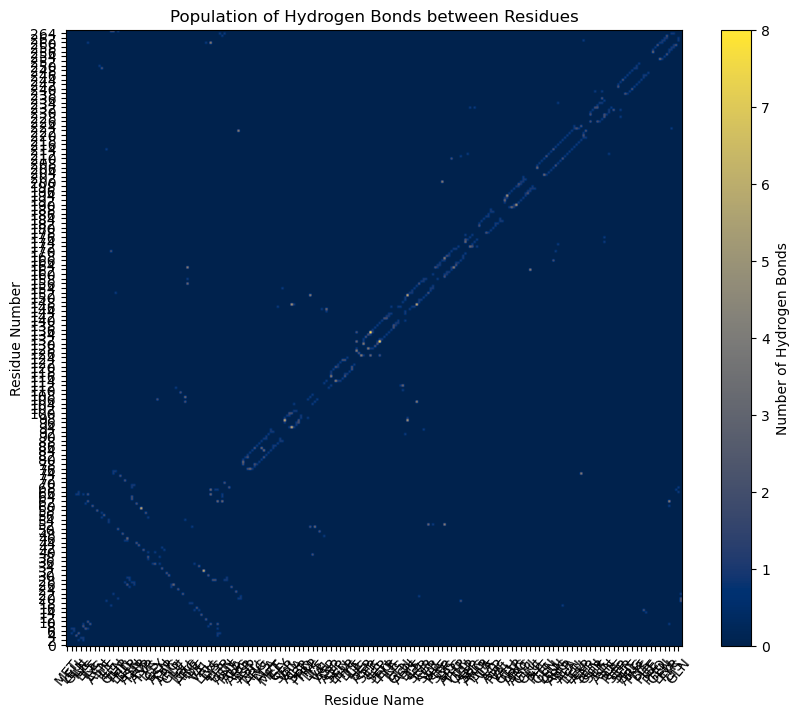

In [73]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Calculate hydrogen bonds
hbonds = md.baker_hubbard(trj, periodic=False)

# Get the maximum residue index
max_residue_index = max(trj.topology.residue(i).index for i in range(trj.n_residues)) + 1

# Initialize a matrix to store the count of hydrogen bonds for each residue
residue_hbond_count = np.zeros((max_residue_index, max_residue_index))

# Loop through each hydrogen bond
for hbond in hbonds:
    # Get the indices of the atoms involved in the hydrogen bond
    donor_index = hbond[0]
    acceptor_index = hbond[2]
    
    # Get the residue indices of the donor and acceptor atoms
    donor_residue_index = trj.topology.atom(donor_index).residue.index
    acceptor_residue_index = trj.topology.atom(acceptor_index).residue.index
    
    # Increment the count for the donor and acceptor residues
    residue_hbond_count[donor_residue_index, acceptor_residue_index] += 1
    residue_hbond_count[acceptor_residue_index, donor_residue_index] += 1

# Plotting 2D colormap
plt.figure(figsize=(10, 8))
plt.imshow(residue_hbond_count, cmap='cividis', origin='lower')
plt.colorbar(label='Number of Hydrogen Bonds')

# Get the residue names and numbers
residue_names = [residue.name for residue in trj.topology.residues]
residue_numbers = [residue.index for residue in trj.topology.residues]

# Show every 2th residue name and number
plt.xticks(range(0, max_residue_index, 2), [residue_names[i] for i in range(0, max_residue_index, 2)], rotation=50)
plt.yticks(range(0, max_residue_index, 2), [residue_numbers[i] for i in range(0, max_residue_index, 2)])

plt.xlabel('Residue Name')
plt.ylabel('Residue Number')
plt.title('Population of Hydrogen Bonds between Residues')
plt.grid(False)
plt.show()


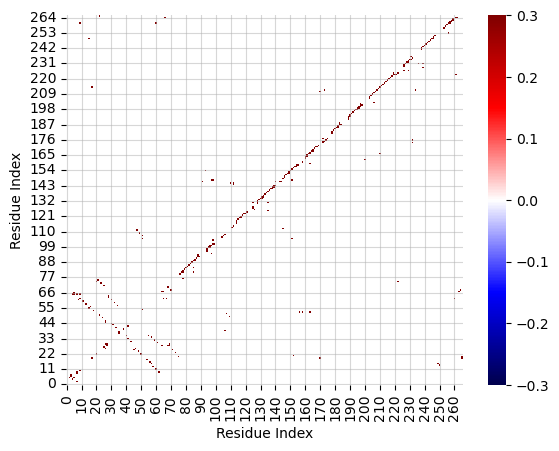

In [74]:
import seaborn as sns
import numpy as np

def plot_hbond_map(hbond_populations):
    mask = np.zeros_like(hbond_populations)
    zeros = np.where((hbond_populations < 0.10) & (hbond_populations > -0.10))
    mask[zeros] = True
    
    ax = sns.heatmap(hbond_populations, mask=mask, vmin=-0.3, vmax=0.3, cmap='seismic')
    
    ax.invert_yaxis()
    ax.grid(which='both', alpha=0.5)
    ax.set_xlabel('Residue Index')
    ax.set_ylabel('Residue Index')
    plt.show()

# Example usage
# hbond_populations should contain the population of hydrogen bonds for each residue
# Make sure hbond_populations is a numpy array and contains the correct data
plot_hbond_map(hbond_populations)

